## QSAR AQUATIC TOXICITY

Data source: https://archive.ics.uci.edu/ml/datasets/QSAR+aquatic+toxicity

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
from pylab import rcParams
from matplotlib import rc
rcParams['figure.figsize'] = 16,10

import tensorflow as tf
from tensorflow import keras

rs = 42

np.random.seed(rs)
tf.random.set_seed(rs)

In [2]:
raw = pd.read_csv('qsar_aquatic_toxicity.csv', delimiter = ';', header=None)
raw.head()

,0,1,2,3,4,5,6,7,8
0,0.00,0.0,0,2.419,1.225,0.667,0,0,3.740
1,0.00,0.0,0,2.638,1.401,0.632,0,0,4.330
2,9.23,11.0,0,5.799,2.930,0.486,0,0,7.019
3,9.23,11.0,0,5.453,2.887,0.495,0,0,6.723
4,9.23,11.0,0,4.068,2.758,0.695,0,0,5.979


In [3]:
raw.columns = ['TPSA','SAacc','H-050','MLOGP','RDCHI','GATS1p','nN','C-040','Response']

In [4]:
raw.head()

,TPSA,SAacc,H-050,MLOGP,RDCHI,GATS1p,nN,C-040,Response
0,0.00,0.0,0,2.419,1.225,0.667,0,0,3.740
1,0.00,0.0,0,2.638,1.401,0.632,0,0,4.330
2,9.23,11.0,0,5.799,2.930,0.486,0,0,7.019
3,9.23,11.0,0,5.453,2.887,0.495,0,0,6.723
4,9.23,11.0,0,4.068,2.758,0.695,0,0,5.979


array([[<AxesSubplot:title={'center':'TPSA'}>,
        <AxesSubplot:title={'center':'SAacc'}>,
        <AxesSubplot:title={'center':'H-050'}>],
       [<AxesSubplot:title={'center':'MLOGP'}>,
        <AxesSubplot:title={'center':'RDCHI'}>,
        <AxesSubplot:title={'center':'GATS1p'}>],
       [<AxesSubplot:title={'center':'nN'}>,
        <AxesSubplot:title={'center':'C-040'}>,
        <AxesSubplot:title={'center':'Response'}>]], dtype=object)

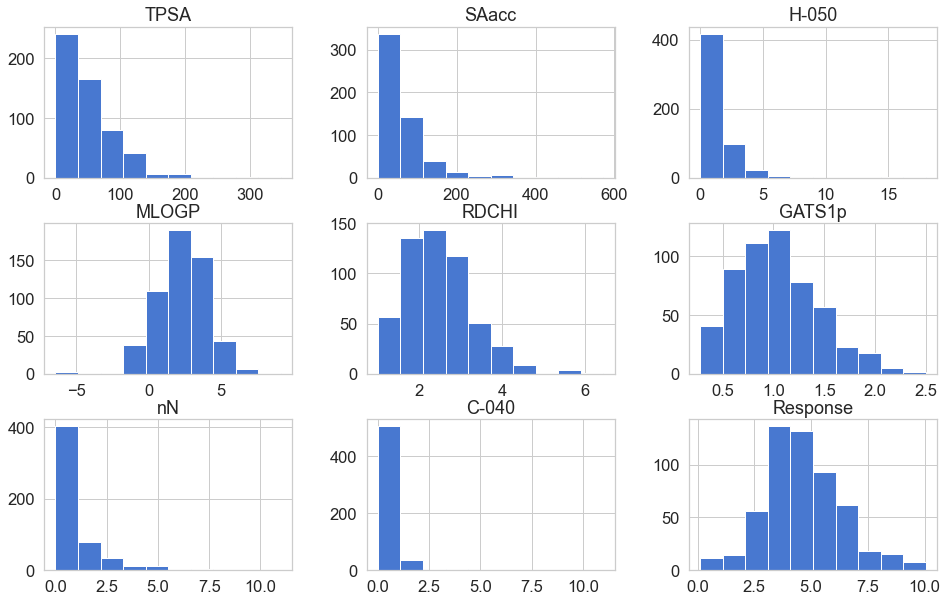

In [5]:
raw.hist()

In [6]:
#the target is approximately normally distributed, what a time to be alive
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
#the following function is supposed to scale the data, return train and test set at desired test size and its targets
def scale_split(data, scaler, test_size = 30):
    features, targets = data.iloc[:,:-1], data.iloc[:,-1:]
    features = scaler.fit_transform(features)
    X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=test_size,random_state = rs)
    print('Returning the following subsets:')
    for ds, name in zip([X_train, y_train, X_test, y_test],['X_train', 'y_train', 'X_test', 'y_test']):
        print(name,':',len(ds),'rows.')
    
    return X_train, y_train, X_test, y_test
    

In [7]:
#the following function will train the model and plot training history and return the model

def train_model(X, y, neurons = 16, do=0.2, lr=0.001, val_split = 0.1, e = 50, bs = 32, call = True, pat = 3):
    
    if call:
        ES = keras.callbacks.EarlyStopping(patience = pat, monitor = 'val_loss', restore_best_weights = True)
        calls = [ES]
    else:
        calls = None
    model = keras.Sequential([
        keras.layers.Dense(units = neurons, input_shape=(X.shape[1],), activation = 'selu', kernel_initializer = 'lecun_normal'),
        keras.layers.Dropout(do),
        keras.layers.Dense(units = neurons, activation = 'selu', kernel_initializer = 'lecun_normal'),
        keras.layers.Dropout(do),
        keras.layers.Dense(1)
    ])
    adam = keras.optimizers.Adam(lr)
    model.compile(loss='mse', optimizer = adam, metrics = tf.keras.metrics.RootMeanSquaredError())
    history = model.fit(X, y, validation_split = val_split, epochs = e, batch_size = bs, callbacks = calls, verbose = 2)
    
    plt.figure(figsize=(16,10))
    plt.plot(history.history['loss'], label = 'Training loss')
    plt.plot(history.history['val_loss'], label = 'Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(16,10))
    plt.plot(history.history['root_mean_squared_error'], label = 'Training RMSE')
    plt.plot(history.history['val_root_mean_squared_error'], label = 'Validation RMSE')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    return model, history

## First without dealing with the categorical(?) variables

In [8]:
X_train, y_train, X_test, y_test = scale_split(raw, scaler)

Returning the following subsets:
X_train : 516 rows.
y_train : 516 rows.
X_test : 30 rows.
y_test : 30 rows.


Epoch 1/50
15/15 - 0s - loss: 25.5249 - root_mean_squared_error: 5.0522 - val_loss: 17.1512 - val_root_mean_squared_error: 4.1414
Epoch 2/50
15/15 - 0s - loss: 22.6827 - root_mean_squared_error: 4.7626 - val_loss: 15.8424 - val_root_mean_squared_error: 3.9802
Epoch 3/50
15/15 - 0s - loss: 20.9073 - root_mean_squared_error: 4.5724 - val_loss: 14.6138 - val_root_mean_squared_error: 3.8228
Epoch 4/50
15/15 - 0s - loss: 18.9309 - root_mean_squared_error: 4.3510 - val_loss: 13.3221 - val_root_mean_squared_error: 3.6499
Epoch 5/50
15/15 - 0s - loss: 17.3630 - root_mean_squared_error: 4.1669 - val_loss: 12.0057 - val_root_mean_squared_error: 3.4649
Epoch 6/50
15/15 - 0s - loss: 15.2579 - root_mean_squared_error: 3.9061 - val_loss: 10.6547 - val_root_mean_squared_error: 3.2642
Epoch 7/50
15/15 - 0s - loss: 15.1056 - root_mean_squared_error: 3.8866 - val_loss: 9.2913 - val_root_mean_squared_error: 3.0482
Epoch 8/50
15/15 - 0s - loss: 12.7281 - root_mean_squared_error: 3.5676 - val_loss: 7.9860 

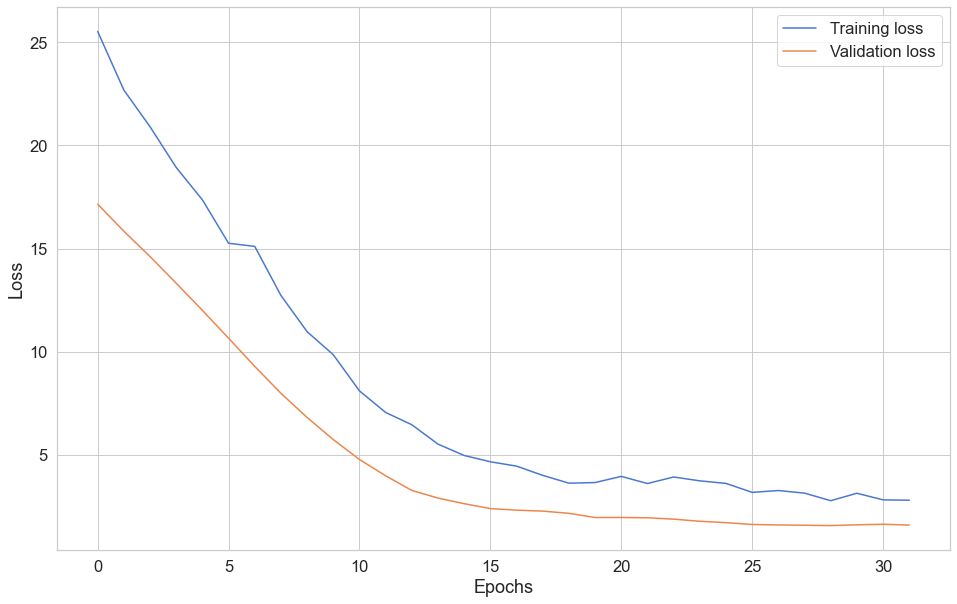

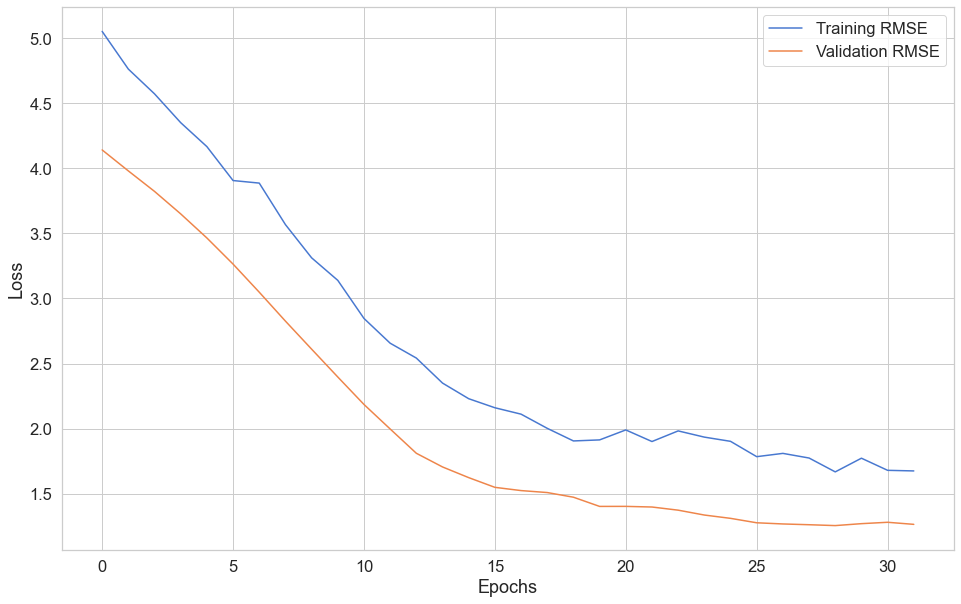

In [9]:
model_1, history_1 = train_model(X_train, y_train)

## Now a model using some kind of categorical variable encoding

In [10]:
raw.columns

Index(['TPSA', 'SAacc', 'H-050', 'MLOGP', 'RDCHI', 'GATS1p', 'nN', 'C-040',
       'Response'],
      dtype='object')

In [11]:
#discovering categorical columns to make sure
for column in raw.columns:
    print(raw[column].value_counts())

0.00      97
20.23     34
26.02     16
45.82     15
9.23      11
          ..
24.06      1
75.74      1
107.65     1
114.76     1
45.34      1
Name: TPSA, Length: 227, dtype: int64
0.000      108
42.683      34
11.000      17
32.897      17
50.747      15
          ... 
310.810      1
83.644       1
571.952      1
185.897      1
157.061      1
Name: SAacc, Length: 210, dtype: int64
0     296
1     121
2      76
3      23
4      15
5       6
6       4
7       2
18      1
16      1
8       1
Name: H-050, dtype: int64
 1.859    7
 2.226    6
 1.246    6
 2.193    6
 3.314    5
         ..
 4.268    1
 1.671    1
 1.602    1
-0.329    1
-0.875    1
Name: MLOGP, Length: 405, dtype: int64
1.975    12
1.334    12
1.401    10
1.509     9
2.031     8
         ..
3.431     1
3.468     1
2.075     1
2.377     1
2.679     1
Name: RDCHI, Length: 342, dtype: int64
0.478    5
1.063    4
0.462    4
0.826    4
1.081    4
        ..
0.950    1
1.328    1
0.959    1
0.485    1
0.486    1
Name: GATS1p, Le

In [12]:
cat_cols = ['H-050','nN','C-040']

In [13]:
categories1 = ['H-050/0','H-050/1','H-050/2','H-050/3','H-050/4','H-050/5','H-050/6','H-050/7','H-050/8','H-050/16','H-050/18']
categories2 = ['nN/0','nN/1','nN/2','nN/3','nN/4','nN/5','nN/6','nN/7','nN/11']
categories3 = ['C-040/0','C-040/1','C-040/2','C-040/3','C-040/4','C-040/11']

first = pd.get_dummies(raw['H-050'])
first.columns = categories1
second = pd.get_dummies(raw['nN'])
second.columns = categories2
third = pd.get_dummies(raw['C-040'])
third.columns = categories3

In [14]:
first

,H-050/0,H-050/1,H-050/2,H-050/3,H-050/4,H-050/5,H-050/6,H-050/7,H-050/8,H-050/16,H-050/18
0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
541,0,0,1,0,0,0,0,0,0,0,0
542,1,0,0,0,0,0,0,0,0,0,0
543,1,0,0,0,0,0,0,0,0,0,0
544,1,0,0,0,0,0,0,0,0,0,0


In [15]:
second

,nN/0,nN/1,nN/2,nN/3,nN/4,nN/5,nN/6,nN/7,nN/11
0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
541,0,0,1,0,0,0,0,0,0
542,1,0,0,0,0,0,0,0,0
543,1,0,0,0,0,0,0,0,0
544,1,0,0,0,0,0,0,0,0


In [16]:
third

,C-040/0,C-040/1,C-040/2,C-040/3,C-040/4,C-040/11
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
541,1,0,0,0,0,0
542,1,0,0,0,0,0
543,1,0,0,0,0,0
544,1,0,0,0,0,0


In [17]:
raw1 = raw.copy()

In [18]:
raw = pd.concat([raw,first,second,third], axis = 1)

In [19]:
raw.columns

Index(['TPSA', 'SAacc', 'H-050', 'MLOGP', 'RDCHI', 'GATS1p', 'nN', 'C-040',
       'Response', 'H-050/0', 'H-050/1', 'H-050/2', 'H-050/3', 'H-050/4',
       'H-050/5', 'H-050/6', 'H-050/7', 'H-050/8', 'H-050/16', 'H-050/18',
       'nN/0', 'nN/1', 'nN/2', 'nN/3', 'nN/4', 'nN/5', 'nN/6', 'nN/7', 'nN/11',
       'C-040/0', 'C-040/1', 'C-040/2', 'C-040/3', 'C-040/4', 'C-040/11'],
      dtype='object')

In [20]:
raw = raw[['TPSA', 'SAacc','MLOGP', 'RDCHI', 'GATS1p', 'nN',
       'H-050/0', 'H-050/1', 'H-050/2', 'H-050/3', 'H-050/4',
       'H-050/5', 'H-050/6', 'H-050/7', 'H-050/8', 'H-050/16', 'H-050/18',
       'nN/0', 'nN/1', 'nN/2', 'nN/3', 'nN/4', 'nN/5', 'nN/6', 'nN/7', 'nN/11',
       'C-040/0', 'C-040/1', 'C-040/2', 'C-040/3', 'C-040/4', 'C-040/11', 'Response' ]]

In [21]:
raw.head()

,TPSA,SAacc,MLOGP,RDCHI,GATS1p,nN,H-050/0,H-050/1,H-050/2,H-050/3,...,nN/6,nN/7,nN/11,C-040/0,C-040/1,C-040/2,C-040/3,C-040/4,C-040/11,Response
0,0.00,0.0,2.419,1.225,0.667,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,3.740
1,0.00,0.0,2.638,1.401,0.632,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,4.330
2,9.23,11.0,5.799,2.930,0.486,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,7.019
3,9.23,11.0,5.453,2.887,0.495,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,6.723
4,9.23,11.0,4.068,2.758,0.695,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,5.979


In [22]:
scaler2 = StandardScaler()
Xn_train, yn_train, Xn_test, yn_test = scale_split(raw,scaler2)

Returning the following subsets:
X_train : 516 rows.
y_train : 516 rows.
X_test : 30 rows.
y_test : 30 rows.


In [23]:
len(raw.columns)

33

Epoch 1/50
15/15 - 0s - loss: 23.6641 - root_mean_squared_error: 4.8646 - val_loss: 19.0688 - val_root_mean_squared_error: 4.3668
Epoch 2/50
15/15 - 0s - loss: 17.8062 - root_mean_squared_error: 4.2197 - val_loss: 15.9666 - val_root_mean_squared_error: 3.9958
Epoch 3/50
15/15 - 0s - loss: 14.0108 - root_mean_squared_error: 3.7431 - val_loss: 13.3012 - val_root_mean_squared_error: 3.6471
Epoch 4/50
15/15 - 0s - loss: 9.9034 - root_mean_squared_error: 3.1470 - val_loss: 11.0932 - val_root_mean_squared_error: 3.3306
Epoch 5/50
15/15 - 0s - loss: 6.8311 - root_mean_squared_error: 2.6136 - val_loss: 8.3896 - val_root_mean_squared_error: 2.8965
Epoch 6/50
15/15 - 0s - loss: 5.1270 - root_mean_squared_error: 2.2643 - val_loss: 6.5541 - val_root_mean_squared_error: 2.5601
Epoch 7/50
15/15 - 0s - loss: 3.8059 - root_mean_squared_error: 1.9509 - val_loss: 5.2250 - val_root_mean_squared_error: 2.2858
Epoch 8/50
15/15 - 0s - loss: 3.9710 - root_mean_squared_error: 1.9927 - val_loss: 3.9617 - val_r

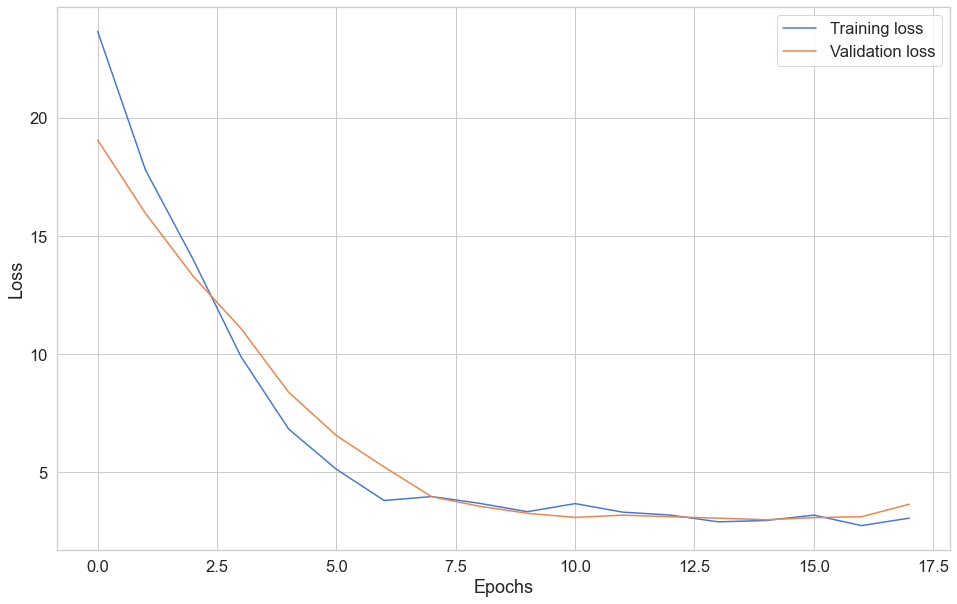

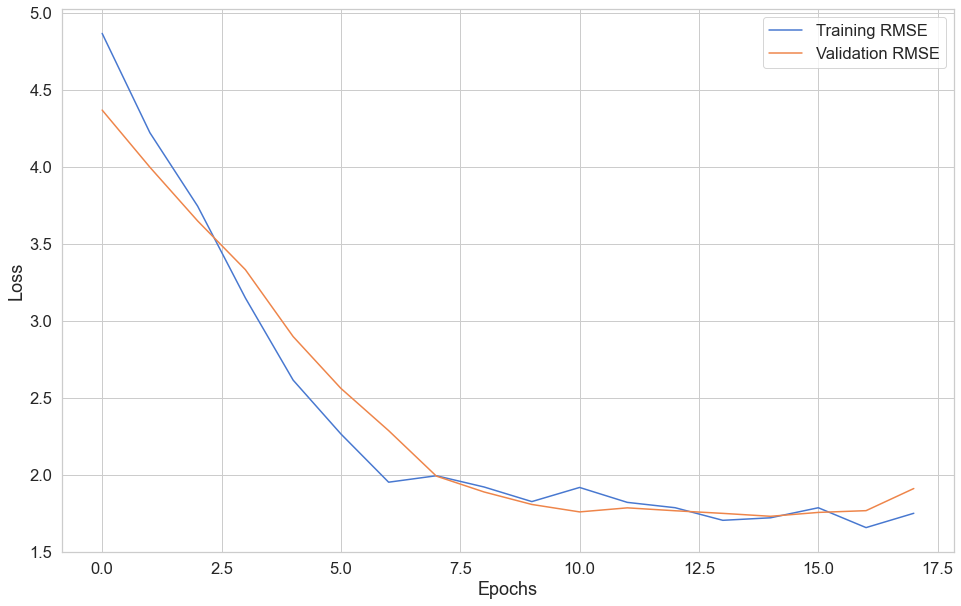

In [24]:
model_2, history_2 = train_model(Xn_train, yn_train, neurons = 70)

## Replacing SELU with ReLU

In [25]:
def train_model_relu(X, y, neurons = 16, do=0.2, lr=0.001, val_split = 0.1, e = 50, bs = 32, call = True, pat = 3):
    
    if call:
        ES = tf.keras.callbacks.EarlyStopping(patience = pat, monitor = 'val_loss', restore_best_weights = True)
        calls = [ES]
    else:
        calls = None
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(units = neurons, input_shape=(X.shape[1],), activation = 'relu'),
        tf.keras.layers.Dropout(do),
        tf.keras.layers.Dense(units = neurons, activation = 'relu'),
        tf.keras.layers.Dropout(do),
        tf.keras.layers.Dense(1)
    ])
    adam = tf.keras.optimizers.Adam(lr)
    model.compile(loss='mse', optimizer = adam, metrics = tf.keras.metrics.RootMeanSquaredError())
    history = model.fit(X, y, validation_split = val_split, epochs = e, batch_size = bs, callbacks = calls, verbose = 2)
    
    plt.figure(figsize=(16,10))
    plt.plot(history.history['loss'], label = 'Training loss')
    plt.plot(history.history['val_loss'], label = 'Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(16,10))
    plt.plot(history.history['root_mean_squared_error'], label = 'Training RMSE')
    plt.plot(history.history['val_root_mean_squared_error'], label = 'Validation RMSE')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    return model, history

Epoch 1/50
15/15 - 0s - loss: 16.0075 - root_mean_squared_error: 4.0009 - val_loss: 8.5078 - val_root_mean_squared_error: 2.9168
Epoch 2/50
15/15 - 0s - loss: 9.0413 - root_mean_squared_error: 3.0069 - val_loss: 4.2023 - val_root_mean_squared_error: 2.0500
Epoch 3/50
15/15 - 0s - loss: 5.2534 - root_mean_squared_error: 2.2920 - val_loss: 2.3118 - val_root_mean_squared_error: 1.5205
Epoch 4/50
15/15 - 0s - loss: 4.0737 - root_mean_squared_error: 2.0183 - val_loss: 1.9230 - val_root_mean_squared_error: 1.3867
Epoch 5/50
15/15 - 0s - loss: 3.2677 - root_mean_squared_error: 1.8077 - val_loss: 1.7077 - val_root_mean_squared_error: 1.3068
Epoch 6/50
15/15 - 0s - loss: 2.8944 - root_mean_squared_error: 1.7013 - val_loss: 1.5259 - val_root_mean_squared_error: 1.2353
Epoch 7/50
15/15 - 0s - loss: 2.3945 - root_mean_squared_error: 1.5474 - val_loss: 1.4818 - val_root_mean_squared_error: 1.2173
Epoch 8/50
15/15 - 0s - loss: 2.3036 - root_mean_squared_error: 1.5178 - val_loss: 1.4334 - val_root_me

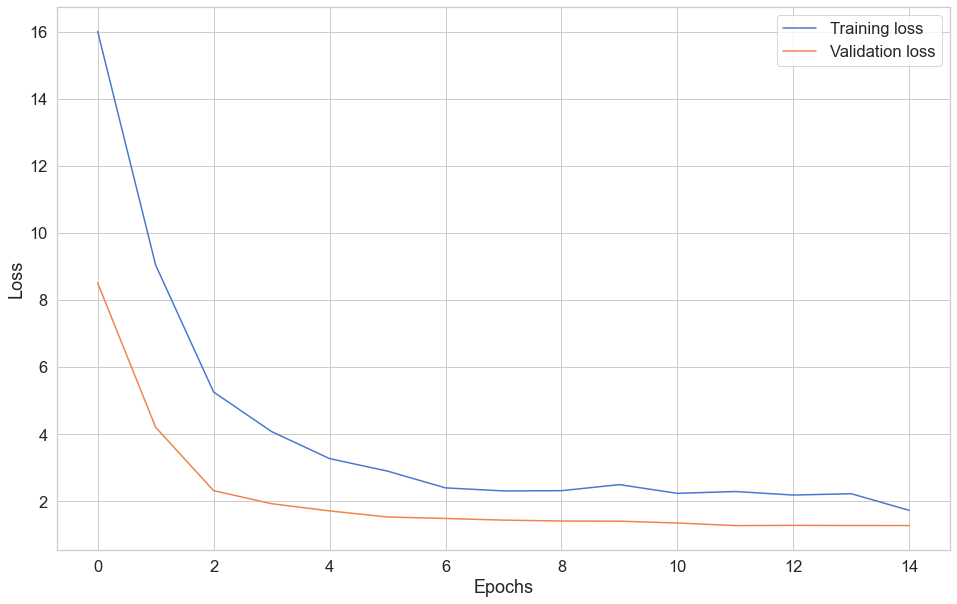

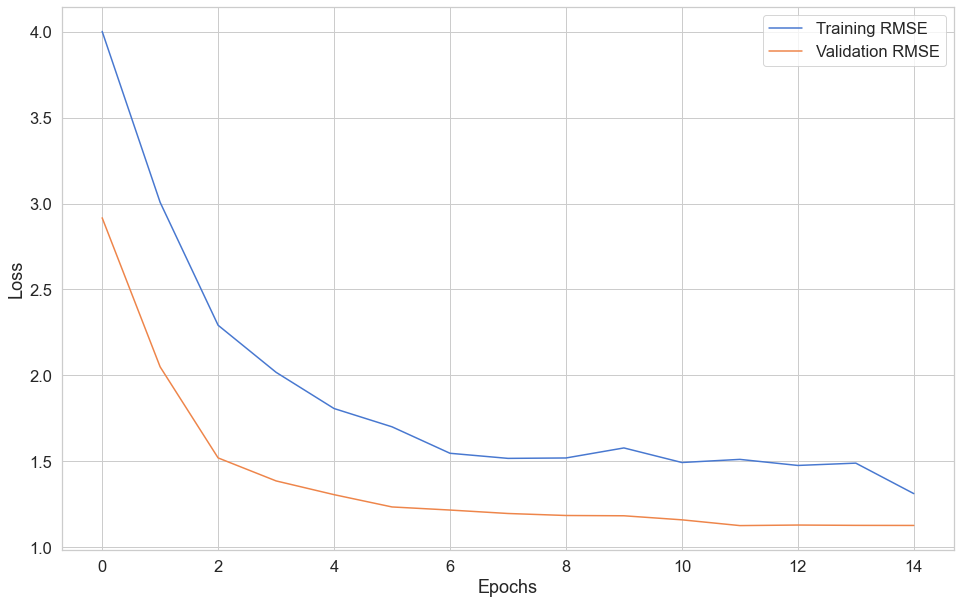

In [26]:
model_relu, history_relu = train_model_relu(Xn_train, yn_train, neurons = 70)

Well it seems that relu performs better on the encoded dataset than the selu activation function, the mean error is now at around 1.2. Again - harder and more complicated way is not always the right one.

### FEATURE IMPORTANCES

In [27]:
import shap
shap.initjs()

explainer = shap.DeepExplainer(model_relu, Xn_train)
shap_values = explainer.shap_values(Xn_test)

Instructions for updating:
Simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


keras is no longer supported, please use tf.keras instead.


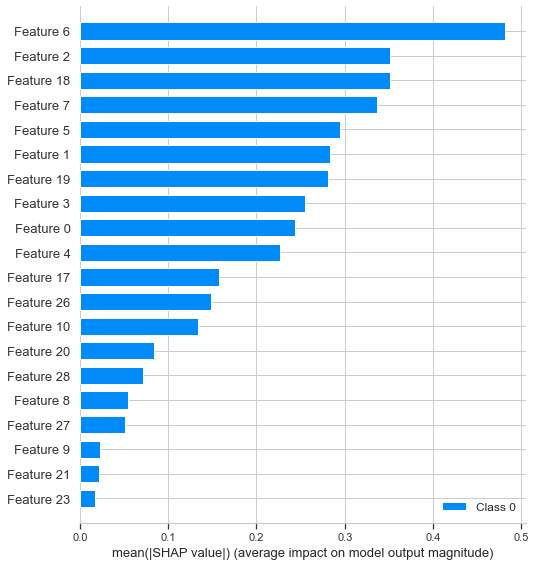

In [28]:
shap.summary_plot(shap_values, Xn_test, plot_type='bar')

# ALTERNATIVE - XGBOOST WITH RANDOMIZED SEARCH


In [29]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

In [30]:
from scipy.stats import reciprocal, uniform

In [31]:
train_dmatrix = xgb.DMatrix(data=Xn_train, label=yn_train)
test_dmatrix = xgb.DMatrix(data=Xn_test, label=yn_test)

In [32]:
train_dmatrix

Using random search to determine the best parameters for the xgboost model

In [33]:
param_1 =  {'eta': reciprocal(0.03,0.3), 'max_depth': [2,3,4,5,6,7,8], 'subsample':[0.5,0.6,0.7,0.8],
           'gamma': uniform(0,1), 'lambda': [0,1,3,5,10,20,50], 'alpha': [0,1,3,5,10,20,50], 'objective':['reg:squarederror']}

In [34]:
xgbr = xgb.XGBRegressor()

In [35]:
import time
random_search = RandomizedSearchCV(xgbr, param_distributions=param_1, 
                                   n_iter=1000, scoring='neg_mean_squared_error', 
                                   cv=3, verbose=2, random_state=42 )
print('Randomized search commencing...')
time_start = time.time()
random_search.fit(Xn_train, yn_train)

print("Randomized search time:", time.time() - time_start)

Randomized search commencing...
Fitting 3 folds for each of 1000 candidates, totalling 3000 fits
[CV] alpha=50, eta=0.18778644552862608, gamma=0.1834347898661638, lambda=10, max_depth=6, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=50, eta=0.18778644552862608, gamma=0.1834347898661638, lambda=10, max_depth=6, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=50, eta=0.18778644552862608, gamma=0.1834347898661638, lambda=10, max_depth=6, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=50, eta=0.18778644552862608, gamma=0.1834347898661638, lambda=10, max_depth=6, objective=reg:squarederror, subsample=0.7, total=   0.0s
[CV] alpha=50, eta=0.18778644552862608, gamma=0.1834347898661638, lambda=10, max_depth=6, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=50, eta=0.18778644552862608, gamma=0.1834347898661638, lambda=10, max_depth=6, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=1, eta=0.04296509486733455, gamma=0.0580836121681

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  alpha=1, eta=0.04296509486733455, gamma=0.05808361216819946, lambda=10, max_depth=5, objective=reg:squarederror, subsample=0.8, total=   0.1s
[CV] alpha=1, eta=0.04296509486733455, gamma=0.05808361216819946, lambda=10, max_depth=5, objective=reg:squarederror, subsample=0.8 
[CV]  alpha=1, eta=0.04296509486733455, gamma=0.05808361216819946, lambda=10, max_depth=5, objective=reg:squarederror, subsample=0.8, total=   0.1s
[CV] alpha=1, eta=0.04296509486733455, gamma=0.05808361216819946, lambda=10, max_depth=5, objective=reg:squarederror, subsample=0.8 
[CV]  alpha=1, eta=0.04296509486733455, gamma=0.05808361216819946, lambda=10, max_depth=5, objective=reg:squarederror, subsample=0.8, total=   0.1s
[CV] alpha=3, eta=0.03145616317558385, gamma=0.9699098521619943, lambda=5, max_depth=7, objective=reg:squarederror, subsample=0.6 
[CV]  alpha=3, eta=0.03145616317558385, gamma=0.9699098521619943, lambda=5, max_depth=7, objective=reg:squarederror, subsample=0.6, total=   0.1s
[CV] alpha=3,

[CV]  alpha=50, eta=0.04471836415596979, gamma=0.3910606075732408, lambda=1, max_depth=5, objective=reg:squarederror, subsample=0.6, total=   0.1s
[CV] alpha=20, eta=0.09935489664217143, gamma=0.5467102793432796, lambda=20, max_depth=6, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=20, eta=0.09935489664217143, gamma=0.5467102793432796, lambda=20, max_depth=6, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=20, eta=0.09935489664217143, gamma=0.5467102793432796, lambda=20, max_depth=6, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=20, eta=0.09935489664217143, gamma=0.5467102793432796, lambda=20, max_depth=6, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=20, eta=0.09935489664217143, gamma=0.5467102793432796, lambda=20, max_depth=6, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=20, eta=0.09935489664217143, gamma=0.5467102793432796, lambda=20, max_depth=6, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha

[CV]  alpha=3, eta=0.0395107706557653, gamma=0.713244787222995, lambda=0, max_depth=6, objective=reg:squarederror, subsample=0.6, total=   0.1s
[CV] alpha=3, eta=0.0395107706557653, gamma=0.713244787222995, lambda=0, max_depth=6, objective=reg:squarederror, subsample=0.6 
[CV]  alpha=3, eta=0.0395107706557653, gamma=0.713244787222995, lambda=0, max_depth=6, objective=reg:squarederror, subsample=0.6, total=   0.1s
[CV] alpha=50, eta=0.1770469439407016, gamma=0.49379559636439074, lambda=0, max_depth=8, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=50, eta=0.1770469439407016, gamma=0.49379559636439074, lambda=0, max_depth=8, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=50, eta=0.1770469439407016, gamma=0.49379559636439074, lambda=0, max_depth=8, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=50, eta=0.1770469439407016, gamma=0.49379559636439074, lambda=0, max_depth=8, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=50, eta=0.1770

[CV]  alpha=10, eta=0.14776013785367864, gamma=0.2694123337985215, lambda=50, max_depth=4, objective=reg:squarederror, subsample=0.6, total=   0.1s
[CV] alpha=10, eta=0.14776013785367864, gamma=0.2694123337985215, lambda=50, max_depth=4, objective=reg:squarederror, subsample=0.6 
[CV]  alpha=10, eta=0.14776013785367864, gamma=0.2694123337985215, lambda=50, max_depth=4, objective=reg:squarederror, subsample=0.6, total=   0.1s
[CV] alpha=0, eta=0.07602517452233619, gamma=0.06489224710898156, lambda=1, max_depth=5, objective=reg:squarederror, subsample=0.8 
[CV]  alpha=0, eta=0.07602517452233619, gamma=0.06489224710898156, lambda=1, max_depth=5, objective=reg:squarederror, subsample=0.8, total=   0.1s
[CV] alpha=0, eta=0.07602517452233619, gamma=0.06489224710898156, lambda=1, max_depth=5, objective=reg:squarederror, subsample=0.8 
[CV]  alpha=0, eta=0.07602517452233619, gamma=0.06489224710898156, lambda=1, max_depth=5, objective=reg:squarederror, subsample=0.8, total=   0.1s
[CV] alpha=0,

[CV]  alpha=50, eta=0.04482163387273093, gamma=0.690937738102466, lambda=50, max_depth=3, objective=reg:squarederror, subsample=0.8, total=   0.1s
[CV] alpha=0, eta=0.14217111575348593, gamma=0.7352161192407721, lambda=1, max_depth=8, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=0, eta=0.14217111575348593, gamma=0.7352161192407721, lambda=1, max_depth=8, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=0, eta=0.14217111575348593, gamma=0.7352161192407721, lambda=1, max_depth=8, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=0, eta=0.14217111575348593, gamma=0.7352161192407721, lambda=1, max_depth=8, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=0, eta=0.14217111575348593, gamma=0.7352161192407721, lambda=1, max_depth=8, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=0, eta=0.14217111575348593, gamma=0.7352161192407721, lambda=1, max_depth=8, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=20, eta=0.1

[CV]  alpha=50, eta=0.05340514189758824, gamma=0.5898708475605439, lambda=20, max_depth=6, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=50, eta=0.05340514189758824, gamma=0.5898708475605439, lambda=20, max_depth=6, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=50, eta=0.05340514189758824, gamma=0.5898708475605439, lambda=20, max_depth=6, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=20, eta=0.2416684977472116, gamma=0.43439436551042865, lambda=10, max_depth=7, objective=reg:squarederror, subsample=0.5 
[CV]  alpha=20, eta=0.2416684977472116, gamma=0.43439436551042865, lambda=10, max_depth=7, objective=reg:squarederror, subsample=0.5, total=   0.1s
[CV] alpha=20, eta=0.2416684977472116, gamma=0.43439436551042865, lambda=10, max_depth=7, objective=reg:squarederror, subsample=0.5 
[CV]  alpha=20, eta=0.2416684977472116, gamma=0.43439436551042865, lambda=10, max_depth=7, objective=reg:squarederror, subsample=0.5, total=   0.1s
[CV] alph

[CV]  alpha=0, eta=0.041090609777258535, gamma=0.7089109969101186, lambda=50, max_depth=6, objective=reg:squarederror, subsample=0.6, total=   0.1s
[CV] alpha=0, eta=0.041090609777258535, gamma=0.7089109969101186, lambda=50, max_depth=6, objective=reg:squarederror, subsample=0.6 
[CV]  alpha=0, eta=0.041090609777258535, gamma=0.7089109969101186, lambda=50, max_depth=6, objective=reg:squarederror, subsample=0.6, total=   0.1s
[CV] alpha=50, eta=0.07886823306597916, gamma=0.25620694359445806, lambda=10, max_depth=5, objective=reg:squarederror, subsample=0.6 
[CV]  alpha=50, eta=0.07886823306597916, gamma=0.25620694359445806, lambda=10, max_depth=5, objective=reg:squarederror, subsample=0.6, total=   0.1s
[CV] alpha=50, eta=0.07886823306597916, gamma=0.25620694359445806, lambda=10, max_depth=5, objective=reg:squarederror, subsample=0.6 
[CV]  alpha=50, eta=0.07886823306597916, gamma=0.25620694359445806, lambda=10, max_depth=5, objective=reg:squarederror, subsample=0.6, total=   0.0s
[CV] 

[CV]  alpha=0, eta=0.07515227917657705, gamma=0.43352073758074205, lambda=1, max_depth=8, objective=reg:squarederror, subsample=0.6, total=   0.1s
[CV] alpha=0, eta=0.07515227917657705, gamma=0.43352073758074205, lambda=1, max_depth=8, objective=reg:squarederror, subsample=0.6 
[CV]  alpha=0, eta=0.07515227917657705, gamma=0.43352073758074205, lambda=1, max_depth=8, objective=reg:squarederror, subsample=0.6, total=   0.1s
[CV] alpha=0, eta=0.07515227917657705, gamma=0.43352073758074205, lambda=1, max_depth=8, objective=reg:squarederror, subsample=0.6 
[CV]  alpha=0, eta=0.07515227917657705, gamma=0.43352073758074205, lambda=1, max_depth=8, objective=reg:squarederror, subsample=0.6, total=   0.1s
[CV] alpha=10, eta=0.045862204767205615, gamma=0.08087296661719767, lambda=50, max_depth=2, objective=reg:squarederror, subsample=0.8 
[CV]  alpha=10, eta=0.045862204767205615, gamma=0.08087296661719767, lambda=50, max_depth=2, objective=reg:squarederror, subsample=0.8, total=   0.0s
[CV] alpha

[CV]  alpha=1, eta=0.12675969058752623, gamma=0.5031362585800877, lambda=0, max_depth=6, objective=reg:squarederror, subsample=0.5, total=   0.1s
[CV] alpha=1, eta=0.12675969058752623, gamma=0.5031362585800877, lambda=0, max_depth=6, objective=reg:squarederror, subsample=0.5 
[CV]  alpha=1, eta=0.12675969058752623, gamma=0.5031362585800877, lambda=0, max_depth=6, objective=reg:squarederror, subsample=0.5, total=   0.1s
[CV] alpha=5, eta=0.12387179163436048, gamma=0.9438916045607572, lambda=1, max_depth=2, objective=reg:squarederror, subsample=0.8 
[CV]  alpha=5, eta=0.12387179163436048, gamma=0.9438916045607572, lambda=1, max_depth=2, objective=reg:squarederror, subsample=0.8, total=   0.1s
[CV] alpha=5, eta=0.12387179163436048, gamma=0.9438916045607572, lambda=1, max_depth=2, objective=reg:squarederror, subsample=0.8 
[CV]  alpha=5, eta=0.12387179163436048, gamma=0.9438916045607572, lambda=1, max_depth=2, objective=reg:squarederror, subsample=0.8, total=   0.0s
[CV] alpha=5, eta=0.123

[CV]  alpha=5, eta=0.07065442079374551, gamma=0.7764129607419968, lambda=50, max_depth=7, objective=reg:squarederror, subsample=0.8, total=   0.1s
[CV] alpha=5, eta=0.07065442079374551, gamma=0.7764129607419968, lambda=50, max_depth=7, objective=reg:squarederror, subsample=0.8 
[CV]  alpha=5, eta=0.07065442079374551, gamma=0.7764129607419968, lambda=50, max_depth=7, objective=reg:squarederror, subsample=0.8, total=   0.1s
[CV] alpha=10, eta=0.05196585946716537, gamma=0.6798447799002458, lambda=50, max_depth=2, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=10, eta=0.05196585946716537, gamma=0.6798447799002458, lambda=50, max_depth=2, objective=reg:squarederror, subsample=0.7, total=   0.0s
[CV] alpha=10, eta=0.05196585946716537, gamma=0.6798447799002458, lambda=50, max_depth=2, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=10, eta=0.05196585946716537, gamma=0.6798447799002458, lambda=50, max_depth=2, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=1

[CV]  alpha=10, eta=0.20682451685552827, gamma=0.4260914750469411, lambda=1, max_depth=2, objective=reg:squarederror, subsample=0.6, total=   0.1s
[CV] alpha=3, eta=0.15253288405592988, gamma=0.08134878064189976, lambda=10, max_depth=7, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=3, eta=0.15253288405592988, gamma=0.08134878064189976, lambda=10, max_depth=7, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=3, eta=0.15253288405592988, gamma=0.08134878064189976, lambda=10, max_depth=7, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=3, eta=0.15253288405592988, gamma=0.08134878064189976, lambda=10, max_depth=7, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=3, eta=0.15253288405592988, gamma=0.08134878064189976, lambda=10, max_depth=7, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=3, eta=0.15253288405592988, gamma=0.08134878064189976, lambda=10, max_depth=7, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha

[CV]  alpha=1, eta=0.04398825020240045, gamma=0.21680910658649122, lambda=50, max_depth=8, objective=reg:squarederror, subsample=0.5, total=   0.1s
[CV] alpha=1, eta=0.04398825020240045, gamma=0.21680910658649122, lambda=50, max_depth=8, objective=reg:squarederror, subsample=0.5 
[CV]  alpha=1, eta=0.04398825020240045, gamma=0.21680910658649122, lambda=50, max_depth=8, objective=reg:squarederror, subsample=0.5, total=   0.1s
[CV] alpha=10, eta=0.14929536007938365, gamma=0.3842018313792199, lambda=50, max_depth=2, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=10, eta=0.14929536007938365, gamma=0.3842018313792199, lambda=50, max_depth=2, objective=reg:squarederror, subsample=0.7, total=   0.0s
[CV] alpha=10, eta=0.14929536007938365, gamma=0.3842018313792199, lambda=50, max_depth=2, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=10, eta=0.14929536007938365, gamma=0.3842018313792199, lambda=50, max_depth=2, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alph

[CV]  alpha=10, eta=0.16853866700128842, gamma=0.3929894489788591, lambda=3, max_depth=4, objective=reg:squarederror, subsample=0.5, total=   0.1s
[CV] alpha=10, eta=0.034724266791604334, gamma=0.03682186763599138, lambda=50, max_depth=2, objective=reg:squarederror, subsample=0.5 
[CV]  alpha=10, eta=0.034724266791604334, gamma=0.03682186763599138, lambda=50, max_depth=2, objective=reg:squarederror, subsample=0.5, total=   0.0s
[CV] alpha=10, eta=0.034724266791604334, gamma=0.03682186763599138, lambda=50, max_depth=2, objective=reg:squarederror, subsample=0.5 
[CV]  alpha=10, eta=0.034724266791604334, gamma=0.03682186763599138, lambda=50, max_depth=2, objective=reg:squarederror, subsample=0.5, total=   0.1s
[CV] alpha=10, eta=0.034724266791604334, gamma=0.03682186763599138, lambda=50, max_depth=2, objective=reg:squarederror, subsample=0.5 
[CV]  alpha=10, eta=0.034724266791604334, gamma=0.03682186763599138, lambda=50, max_depth=2, objective=reg:squarederror, subsample=0.5, total=   0.0

[CV]  alpha=20, eta=0.10763087309548555, gamma=0.09100209105133028, lambda=1, max_depth=5, objective=reg:squarederror, subsample=0.5, total=   0.1s
[CV] alpha=20, eta=0.10763087309548555, gamma=0.09100209105133028, lambda=1, max_depth=5, objective=reg:squarederror, subsample=0.5 
[CV]  alpha=20, eta=0.10763087309548555, gamma=0.09100209105133028, lambda=1, max_depth=5, objective=reg:squarederror, subsample=0.5, total=   0.1s
[CV] alpha=20, eta=0.08472892613432664, gamma=0.910471278403273, lambda=20, max_depth=8, objective=reg:squarederror, subsample=0.6 
[CV]  alpha=20, eta=0.08472892613432664, gamma=0.910471278403273, lambda=20, max_depth=8, objective=reg:squarederror, subsample=0.6, total=   0.1s
[CV] alpha=20, eta=0.08472892613432664, gamma=0.910471278403273, lambda=20, max_depth=8, objective=reg:squarederror, subsample=0.6 
[CV]  alpha=20, eta=0.08472892613432664, gamma=0.910471278403273, lambda=20, max_depth=8, objective=reg:squarederror, subsample=0.6, total=   0.1s
[CV] alpha=20

[CV]  alpha=0, eta=0.14618606358217887, gamma=0.5116570135472612, lambda=3, max_depth=8, objective=reg:squarederror, subsample=0.8, total=   0.1s
[CV] alpha=0, eta=0.14618606358217887, gamma=0.5116570135472612, lambda=3, max_depth=8, objective=reg:squarederror, subsample=0.8 
[CV]  alpha=0, eta=0.14618606358217887, gamma=0.5116570135472612, lambda=3, max_depth=8, objective=reg:squarederror, subsample=0.8, total=   0.1s
[CV] alpha=0, eta=0.14618606358217887, gamma=0.5116570135472612, lambda=3, max_depth=8, objective=reg:squarederror, subsample=0.8 
[CV]  alpha=0, eta=0.14618606358217887, gamma=0.5116570135472612, lambda=3, max_depth=8, objective=reg:squarederror, subsample=0.8, total=   0.1s
[CV] alpha=10, eta=0.030179794558926193, gamma=0.8683011070355868, lambda=0, max_depth=4, objective=reg:squarederror, subsample=0.5 
[CV]  alpha=10, eta=0.030179794558926193, gamma=0.8683011070355868, lambda=0, max_depth=4, objective=reg:squarederror, subsample=0.5, total=   0.1s
[CV] alpha=10, eta=

[CV]  alpha=50, eta=0.1669401229055674, gamma=0.4316595462296794, lambda=3, max_depth=3, objective=reg:squarederror, subsample=0.5, total=   0.0s
[CV] alpha=10, eta=0.06921553037858116, gamma=0.6459172413316012, lambda=1, max_depth=4, objective=reg:squarederror, subsample=0.8 
[CV]  alpha=10, eta=0.06921553037858116, gamma=0.6459172413316012, lambda=1, max_depth=4, objective=reg:squarederror, subsample=0.8, total=   0.1s
[CV] alpha=10, eta=0.06921553037858116, gamma=0.6459172413316012, lambda=1, max_depth=4, objective=reg:squarederror, subsample=0.8 
[CV]  alpha=10, eta=0.06921553037858116, gamma=0.6459172413316012, lambda=1, max_depth=4, objective=reg:squarederror, subsample=0.8, total=   0.1s
[CV] alpha=10, eta=0.06921553037858116, gamma=0.6459172413316012, lambda=1, max_depth=4, objective=reg:squarederror, subsample=0.8 
[CV]  alpha=10, eta=0.06921553037858116, gamma=0.6459172413316012, lambda=1, max_depth=4, objective=reg:squarederror, subsample=0.8, total=   0.1s
[CV] alpha=3, eta

[CV]  alpha=0, eta=0.10161580872330193, gamma=0.7072300956444445, lambda=20, max_depth=7, objective=reg:squarederror, subsample=0.5, total=   0.1s
[CV] alpha=20, eta=0.042803962015827, gamma=0.4811401018548175, lambda=3, max_depth=4, objective=reg:squarederror, subsample=0.5 
[CV]  alpha=20, eta=0.042803962015827, gamma=0.4811401018548175, lambda=3, max_depth=4, objective=reg:squarederror, subsample=0.5, total=   0.1s
[CV] alpha=20, eta=0.042803962015827, gamma=0.4811401018548175, lambda=3, max_depth=4, objective=reg:squarederror, subsample=0.5 
[CV]  alpha=20, eta=0.042803962015827, gamma=0.4811401018548175, lambda=3, max_depth=4, objective=reg:squarederror, subsample=0.5, total=   0.1s
[CV] alpha=20, eta=0.042803962015827, gamma=0.4811401018548175, lambda=3, max_depth=4, objective=reg:squarederror, subsample=0.5 
[CV]  alpha=20, eta=0.042803962015827, gamma=0.4811401018548175, lambda=3, max_depth=4, objective=reg:squarederror, subsample=0.5, total=   0.1s
[CV] alpha=20, eta=0.0651216

[CV]  alpha=3, eta=0.126247503513545, gamma=0.539781061914633, lambda=50, max_depth=8, objective=reg:squarederror, subsample=0.5, total=   0.1s
[CV] alpha=3, eta=0.126247503513545, gamma=0.539781061914633, lambda=50, max_depth=8, objective=reg:squarederror, subsample=0.5 
[CV]  alpha=3, eta=0.126247503513545, gamma=0.539781061914633, lambda=50, max_depth=8, objective=reg:squarederror, subsample=0.5, total=   0.1s
[CV] alpha=3, eta=0.126247503513545, gamma=0.539781061914633, lambda=50, max_depth=8, objective=reg:squarederror, subsample=0.5 
[CV]  alpha=3, eta=0.126247503513545, gamma=0.539781061914633, lambda=50, max_depth=8, objective=reg:squarederror, subsample=0.5, total=   0.1s
[CV] alpha=0, eta=0.06799605343892634, gamma=0.3914821102015019, lambda=1, max_depth=7, objective=reg:squarederror, subsample=0.5 
[CV]  alpha=0, eta=0.06799605343892634, gamma=0.3914821102015019, lambda=1, max_depth=7, objective=reg:squarederror, subsample=0.5, total=   0.1s
[CV] alpha=0, eta=0.0679960534389

[CV]  alpha=10, eta=0.20133537249066152, gamma=0.9590747945640278, lambda=20, max_depth=7, objective=reg:squarederror, subsample=0.8, total=   0.1s
[CV] alpha=10, eta=0.20133537249066152, gamma=0.9590747945640278, lambda=20, max_depth=7, objective=reg:squarederror, subsample=0.8 
[CV]  alpha=10, eta=0.20133537249066152, gamma=0.9590747945640278, lambda=20, max_depth=7, objective=reg:squarederror, subsample=0.8, total=   0.1s
[CV] alpha=50, eta=0.08692146918828952, gamma=0.9472833396118153, lambda=5, max_depth=3, objective=reg:squarederror, subsample=0.5 
[CV]  alpha=50, eta=0.08692146918828952, gamma=0.9472833396118153, lambda=5, max_depth=3, objective=reg:squarederror, subsample=0.5, total=   0.0s
[CV] alpha=50, eta=0.08692146918828952, gamma=0.9472833396118153, lambda=5, max_depth=3, objective=reg:squarederror, subsample=0.5 
[CV]  alpha=50, eta=0.08692146918828952, gamma=0.9472833396118153, lambda=5, max_depth=3, objective=reg:squarederror, subsample=0.5, total=   0.0s
[CV] alpha=50

[CV]  alpha=3, eta=0.032356975864023044, gamma=0.9127494628791288, lambda=20, max_depth=2, objective=reg:squarederror, subsample=0.7, total=   0.0s
[CV] alpha=3, eta=0.032356975864023044, gamma=0.9127494628791288, lambda=20, max_depth=2, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=3, eta=0.032356975864023044, gamma=0.9127494628791288, lambda=20, max_depth=2, objective=reg:squarederror, subsample=0.7, total=   0.0s
[CV] alpha=3, eta=0.032356975864023044, gamma=0.9127494628791288, lambda=20, max_depth=2, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=3, eta=0.032356975864023044, gamma=0.9127494628791288, lambda=20, max_depth=2, objective=reg:squarederror, subsample=0.7, total=   0.0s
[CV] alpha=5, eta=0.07871304335050797, gamma=0.9148459010681, lambda=0, max_depth=6, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=5, eta=0.07871304335050797, gamma=0.9148459010681, lambda=0, max_depth=6, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=5, eta=0

[CV]  alpha=20, eta=0.10085553125815866, gamma=0.800749771486121, lambda=50, max_depth=5, objective=reg:squarederror, subsample=0.8, total=   0.1s
[CV] alpha=1, eta=0.22085895590107707, gamma=0.4079844953648447, lambda=0, max_depth=8, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=1, eta=0.22085895590107707, gamma=0.4079844953648447, lambda=0, max_depth=8, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=1, eta=0.22085895590107707, gamma=0.4079844953648447, lambda=0, max_depth=8, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=1, eta=0.22085895590107707, gamma=0.4079844953648447, lambda=0, max_depth=8, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=1, eta=0.22085895590107707, gamma=0.4079844953648447, lambda=0, max_depth=8, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=1, eta=0.22085895590107707, gamma=0.4079844953648447, lambda=0, max_depth=8, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=50, eta=0.1

[CV]  alpha=0, eta=0.22160993717327374, gamma=0.48743119824951364, lambda=20, max_depth=8, objective=reg:squarederror, subsample=0.8, total=   0.1s
[CV] alpha=0, eta=0.22160993717327374, gamma=0.48743119824951364, lambda=20, max_depth=8, objective=reg:squarederror, subsample=0.8 
[CV]  alpha=0, eta=0.22160993717327374, gamma=0.48743119824951364, lambda=20, max_depth=8, objective=reg:squarederror, subsample=0.8, total=   0.1s
[CV] alpha=0, eta=0.22160993717327374, gamma=0.48743119824951364, lambda=20, max_depth=8, objective=reg:squarederror, subsample=0.8 
[CV]  alpha=0, eta=0.22160993717327374, gamma=0.48743119824951364, lambda=20, max_depth=8, objective=reg:squarederror, subsample=0.8, total=   0.1s
[CV] alpha=0, eta=0.09160087492968069, gamma=0.5124576558819216, lambda=0, max_depth=3, objective=reg:squarederror, subsample=0.5 
[CV]  alpha=0, eta=0.09160087492968069, gamma=0.5124576558819216, lambda=0, max_depth=3, objective=reg:squarederror, subsample=0.5, total=   0.1s
[CV] alpha=0,

[CV]  alpha=10, eta=0.1203021431331225, gamma=0.24534910968132095, lambda=10, max_depth=4, objective=reg:squarederror, subsample=0.8, total=   0.1s
[CV] alpha=3, eta=0.06804464790660142, gamma=0.7190459051842455, lambda=50, max_depth=4, objective=reg:squarederror, subsample=0.6 
[CV]  alpha=3, eta=0.06804464790660142, gamma=0.7190459051842455, lambda=50, max_depth=4, objective=reg:squarederror, subsample=0.6, total=   0.1s
[CV] alpha=3, eta=0.06804464790660142, gamma=0.7190459051842455, lambda=50, max_depth=4, objective=reg:squarederror, subsample=0.6 
[CV]  alpha=3, eta=0.06804464790660142, gamma=0.7190459051842455, lambda=50, max_depth=4, objective=reg:squarederror, subsample=0.6, total=   0.1s
[CV] alpha=3, eta=0.06804464790660142, gamma=0.7190459051842455, lambda=50, max_depth=4, objective=reg:squarederror, subsample=0.6 
[CV]  alpha=3, eta=0.06804464790660142, gamma=0.7190459051842455, lambda=50, max_depth=4, objective=reg:squarederror, subsample=0.6, total=   0.1s
[CV] alpha=1, e

[CV]  alpha=20, eta=0.2868785353194166, gamma=0.9033638126360249, lambda=5, max_depth=8, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=20, eta=0.2868785353194166, gamma=0.9033638126360249, lambda=5, max_depth=8, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=20, eta=0.2868785353194166, gamma=0.9033638126360249, lambda=5, max_depth=8, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=1, eta=0.03378446619889826, gamma=0.6699174645500392, lambda=1, max_depth=8, objective=reg:squarederror, subsample=0.5 
[CV]  alpha=1, eta=0.03378446619889826, gamma=0.6699174645500392, lambda=1, max_depth=8, objective=reg:squarederror, subsample=0.5, total=   0.1s
[CV] alpha=1, eta=0.03378446619889826, gamma=0.6699174645500392, lambda=1, max_depth=8, objective=reg:squarederror, subsample=0.5 
[CV]  alpha=1, eta=0.03378446619889826, gamma=0.6699174645500392, lambda=1, max_depth=8, objective=reg:squarederror, subsample=0.5, total=   0.1s
[CV] alpha=1, eta=0.033

[CV]  alpha=50, eta=0.0459826677943541, gamma=0.38396388991972574, lambda=3, max_depth=4, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=50, eta=0.0459826677943541, gamma=0.38396388991972574, lambda=3, max_depth=4, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=50, eta=0.0459826677943541, gamma=0.38396388991972574, lambda=3, max_depth=4, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=20, eta=0.06727180338626593, gamma=0.7671882889311269, lambda=10, max_depth=7, objective=reg:squarederror, subsample=0.5 
[CV]  alpha=20, eta=0.06727180338626593, gamma=0.7671882889311269, lambda=10, max_depth=7, objective=reg:squarederror, subsample=0.5, total=   0.1s
[CV] alpha=20, eta=0.06727180338626593, gamma=0.7671882889311269, lambda=10, max_depth=7, objective=reg:squarederror, subsample=0.5 
[CV]  alpha=20, eta=0.06727180338626593, gamma=0.7671882889311269, lambda=10, max_depth=7, objective=reg:squarederror, subsample=0.5, total=   0.1s
[CV] alpha=2

[CV]  alpha=20, eta=0.12157885517086037, gamma=0.5126885110165086, lambda=1, max_depth=4, objective=reg:squarederror, subsample=0.6, total=   0.1s
[CV] alpha=20, eta=0.12157885517086037, gamma=0.5126885110165086, lambda=1, max_depth=4, objective=reg:squarederror, subsample=0.6 
[CV]  alpha=20, eta=0.12157885517086037, gamma=0.5126885110165086, lambda=1, max_depth=4, objective=reg:squarederror, subsample=0.6, total=   0.1s
[CV] alpha=0, eta=0.04984337754191075, gamma=0.18643826214425452, lambda=3, max_depth=7, objective=reg:squarederror, subsample=0.5 
[CV]  alpha=0, eta=0.04984337754191075, gamma=0.18643826214425452, lambda=3, max_depth=7, objective=reg:squarederror, subsample=0.5, total=   0.1s
[CV] alpha=0, eta=0.04984337754191075, gamma=0.18643826214425452, lambda=3, max_depth=7, objective=reg:squarederror, subsample=0.5 
[CV]  alpha=0, eta=0.04984337754191075, gamma=0.18643826214425452, lambda=3, max_depth=7, objective=reg:squarederror, subsample=0.5, total=   0.1s
[CV] alpha=0, et

[CV]  alpha=10, eta=0.23528876256582376, gamma=0.9914753351450482, lambda=1, max_depth=6, objective=reg:squarederror, subsample=0.8, total=   0.1s
[CV] alpha=20, eta=0.11736241549998357, gamma=0.8246809659251492, lambda=1, max_depth=4, objective=reg:squarederror, subsample=0.5 
[CV]  alpha=20, eta=0.11736241549998357, gamma=0.8246809659251492, lambda=1, max_depth=4, objective=reg:squarederror, subsample=0.5, total=   0.1s
[CV] alpha=20, eta=0.11736241549998357, gamma=0.8246809659251492, lambda=1, max_depth=4, objective=reg:squarederror, subsample=0.5 
[CV]  alpha=20, eta=0.11736241549998357, gamma=0.8246809659251492, lambda=1, max_depth=4, objective=reg:squarederror, subsample=0.5, total=   0.1s
[CV] alpha=20, eta=0.11736241549998357, gamma=0.8246809659251492, lambda=1, max_depth=4, objective=reg:squarederror, subsample=0.5 
[CV]  alpha=20, eta=0.11736241549998357, gamma=0.8246809659251492, lambda=1, max_depth=4, objective=reg:squarederror, subsample=0.5, total=   0.1s
[CV] alpha=10, e

[CV]  alpha=50, eta=0.10432486548134934, gamma=0.9629920038589946, lambda=50, max_depth=5, objective=reg:squarederror, subsample=0.8, total=   0.1s
[CV] alpha=50, eta=0.2565366151795167, gamma=0.10250972799067926, lambda=5, max_depth=5, objective=reg:squarederror, subsample=0.8 
[CV]  alpha=50, eta=0.2565366151795167, gamma=0.10250972799067926, lambda=5, max_depth=5, objective=reg:squarederror, subsample=0.8, total=   0.1s
[CV] alpha=50, eta=0.2565366151795167, gamma=0.10250972799067926, lambda=5, max_depth=5, objective=reg:squarederror, subsample=0.8 
[CV]  alpha=50, eta=0.2565366151795167, gamma=0.10250972799067926, lambda=5, max_depth=5, objective=reg:squarederror, subsample=0.8, total=   0.0s
[CV] alpha=50, eta=0.2565366151795167, gamma=0.10250972799067926, lambda=5, max_depth=5, objective=reg:squarederror, subsample=0.8 
[CV]  alpha=50, eta=0.2565366151795167, gamma=0.10250972799067926, lambda=5, max_depth=5, objective=reg:squarederror, subsample=0.8, total=   0.0s
[CV] alpha=5, e

[CV]  alpha=50, eta=0.07885851084462286, gamma=0.6385259476640855, lambda=20, max_depth=4, objective=reg:squarederror, subsample=0.5, total=   0.1s
[CV] alpha=50, eta=0.07885851084462286, gamma=0.6385259476640855, lambda=20, max_depth=4, objective=reg:squarederror, subsample=0.5 
[CV]  alpha=50, eta=0.07885851084462286, gamma=0.6385259476640855, lambda=20, max_depth=4, objective=reg:squarederror, subsample=0.5, total=   0.0s
[CV] alpha=50, eta=0.07885851084462286, gamma=0.6385259476640855, lambda=20, max_depth=4, objective=reg:squarederror, subsample=0.5 
[CV]  alpha=50, eta=0.07885851084462286, gamma=0.6385259476640855, lambda=20, max_depth=4, objective=reg:squarederror, subsample=0.5, total=   0.1s
[CV] alpha=10, eta=0.2891338257164397, gamma=0.409334006315043, lambda=5, max_depth=7, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=10, eta=0.2891338257164397, gamma=0.409334006315043, lambda=5, max_depth=7, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=10, 

[CV]  alpha=10, eta=0.03544607422041354, gamma=0.3924935564066848, lambda=20, max_depth=8, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=20, eta=0.05871970072113757, gamma=0.6949818861265425, lambda=0, max_depth=5, objective=reg:squarederror, subsample=0.6 
[CV]  alpha=20, eta=0.05871970072113757, gamma=0.6949818861265425, lambda=0, max_depth=5, objective=reg:squarederror, subsample=0.6, total=   0.1s
[CV] alpha=20, eta=0.05871970072113757, gamma=0.6949818861265425, lambda=0, max_depth=5, objective=reg:squarederror, subsample=0.6 
[CV]  alpha=20, eta=0.05871970072113757, gamma=0.6949818861265425, lambda=0, max_depth=5, objective=reg:squarederror, subsample=0.6, total=   0.1s
[CV] alpha=20, eta=0.05871970072113757, gamma=0.6949818861265425, lambda=0, max_depth=5, objective=reg:squarederror, subsample=0.6 
[CV]  alpha=20, eta=0.05871970072113757, gamma=0.6949818861265425, lambda=0, max_depth=5, objective=reg:squarederror, subsample=0.6, total=   0.1s
[CV] alpha=0, e

[CV] alpha=50, eta=0.1373856500641519, gamma=0.5530014525919584, lambda=20, max_depth=3, objective=reg:squarederror, subsample=0.6 
[CV]  alpha=50, eta=0.1373856500641519, gamma=0.5530014525919584, lambda=20, max_depth=3, objective=reg:squarederror, subsample=0.6, total=   0.0s
[CV] alpha=1, eta=0.09078729701644701, gamma=0.040754106092472764, lambda=5, max_depth=3, objective=reg:squarederror, subsample=0.6 
[CV]  alpha=1, eta=0.09078729701644701, gamma=0.040754106092472764, lambda=5, max_depth=3, objective=reg:squarederror, subsample=0.6, total=   0.1s
[CV] alpha=1, eta=0.09078729701644701, gamma=0.040754106092472764, lambda=5, max_depth=3, objective=reg:squarederror, subsample=0.6 
[CV]  alpha=1, eta=0.09078729701644701, gamma=0.040754106092472764, lambda=5, max_depth=3, objective=reg:squarederror, subsample=0.6, total=   0.0s
[CV] alpha=1, eta=0.09078729701644701, gamma=0.040754106092472764, lambda=5, max_depth=3, objective=reg:squarederror, subsample=0.6 
[CV]  alpha=1, eta=0.09078

[CV] alpha=1, eta=0.1862418810254509, gamma=0.6550093388321085, lambda=3, max_depth=4, objective=reg:squarederror, subsample=0.6 
[CV]  alpha=1, eta=0.1862418810254509, gamma=0.6550093388321085, lambda=3, max_depth=4, objective=reg:squarederror, subsample=0.6, total=   0.1s
[CV] alpha=1, eta=0.1862418810254509, gamma=0.6550093388321085, lambda=3, max_depth=4, objective=reg:squarederror, subsample=0.6 
[CV]  alpha=1, eta=0.1862418810254509, gamma=0.6550093388321085, lambda=3, max_depth=4, objective=reg:squarederror, subsample=0.6, total=   0.1s
[CV] alpha=20, eta=0.06859181335109617, gamma=0.3838471518677963, lambda=1, max_depth=6, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=20, eta=0.06859181335109617, gamma=0.3838471518677963, lambda=1, max_depth=6, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=20, eta=0.06859181335109617, gamma=0.3838471518677963, lambda=1, max_depth=6, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=20, eta=0.06859181335109617

[CV]  alpha=3, eta=0.2665045386401004, gamma=0.25252778207541926, lambda=20, max_depth=5, objective=reg:squarederror, subsample=0.8, total=   0.1s
[CV] alpha=3, eta=0.2665045386401004, gamma=0.25252778207541926, lambda=20, max_depth=5, objective=reg:squarederror, subsample=0.8 
[CV]  alpha=3, eta=0.2665045386401004, gamma=0.25252778207541926, lambda=20, max_depth=5, objective=reg:squarederror, subsample=0.8, total=   0.1s
[CV] alpha=3, eta=0.2665045386401004, gamma=0.25252778207541926, lambda=20, max_depth=5, objective=reg:squarederror, subsample=0.8 
[CV]  alpha=3, eta=0.2665045386401004, gamma=0.25252778207541926, lambda=20, max_depth=5, objective=reg:squarederror, subsample=0.8, total=   0.1s
[CV] alpha=0, eta=0.12096491159138187, gamma=0.35673205304000166, lambda=5, max_depth=6, objective=reg:squarederror, subsample=0.5 
[CV]  alpha=0, eta=0.12096491159138187, gamma=0.35673205304000166, lambda=5, max_depth=6, objective=reg:squarederror, subsample=0.5, total=   0.1s
[CV] alpha=0, et

[CV]  alpha=1, eta=0.04628820487049967, gamma=0.7308294748708763, lambda=10, max_depth=7, objective=reg:squarederror, subsample=0.5, total=   0.1s
[CV] alpha=50, eta=0.04510981480806128, gamma=0.6926259522261645, lambda=50, max_depth=8, objective=reg:squarederror, subsample=0.6 
[CV]  alpha=50, eta=0.04510981480806128, gamma=0.6926259522261645, lambda=50, max_depth=8, objective=reg:squarederror, subsample=0.6, total=   0.1s
[CV] alpha=50, eta=0.04510981480806128, gamma=0.6926259522261645, lambda=50, max_depth=8, objective=reg:squarederror, subsample=0.6 
[CV]  alpha=50, eta=0.04510981480806128, gamma=0.6926259522261645, lambda=50, max_depth=8, objective=reg:squarederror, subsample=0.6, total=   0.1s
[CV] alpha=50, eta=0.04510981480806128, gamma=0.6926259522261645, lambda=50, max_depth=8, objective=reg:squarederror, subsample=0.6 
[CV]  alpha=50, eta=0.04510981480806128, gamma=0.6926259522261645, lambda=50, max_depth=8, objective=reg:squarederror, subsample=0.6, total=   0.1s
[CV] alpha

[CV]  alpha=20, eta=0.1051018480990287, gamma=0.0057586604981215705, lambda=50, max_depth=2, objective=reg:squarederror, subsample=0.8, total=   0.0s
[CV] alpha=1, eta=0.0746954153142189, gamma=0.6954672066898622, lambda=5, max_depth=6, objective=reg:squarederror, subsample=0.5 
[CV]  alpha=1, eta=0.0746954153142189, gamma=0.6954672066898622, lambda=5, max_depth=6, objective=reg:squarederror, subsample=0.5, total=   0.1s
[CV] alpha=1, eta=0.0746954153142189, gamma=0.6954672066898622, lambda=5, max_depth=6, objective=reg:squarederror, subsample=0.5 
[CV]  alpha=1, eta=0.0746954153142189, gamma=0.6954672066898622, lambda=5, max_depth=6, objective=reg:squarederror, subsample=0.5, total=   0.1s
[CV] alpha=1, eta=0.0746954153142189, gamma=0.6954672066898622, lambda=5, max_depth=6, objective=reg:squarederror, subsample=0.5 
[CV]  alpha=1, eta=0.0746954153142189, gamma=0.6954672066898622, lambda=5, max_depth=6, objective=reg:squarederror, subsample=0.5, total=   0.1s
[CV] alpha=0, eta=0.05184

[CV]  alpha=3, eta=0.2551097940448365, gamma=0.5322602133390402, lambda=1, max_depth=5, objective=reg:squarederror, subsample=0.6, total=   0.1s
[CV] alpha=3, eta=0.2551097940448365, gamma=0.5322602133390402, lambda=1, max_depth=5, objective=reg:squarederror, subsample=0.6 
[CV]  alpha=3, eta=0.2551097940448365, gamma=0.5322602133390402, lambda=1, max_depth=5, objective=reg:squarederror, subsample=0.6, total=   0.1s
[CV] alpha=1, eta=0.07534014670190539, gamma=0.9767252386625789, lambda=1, max_depth=2, objective=reg:squarederror, subsample=0.6 
[CV]  alpha=1, eta=0.07534014670190539, gamma=0.9767252386625789, lambda=1, max_depth=2, objective=reg:squarederror, subsample=0.6, total=   0.1s
[CV] alpha=1, eta=0.07534014670190539, gamma=0.9767252386625789, lambda=1, max_depth=2, objective=reg:squarederror, subsample=0.6 
[CV]  alpha=1, eta=0.07534014670190539, gamma=0.9767252386625789, lambda=1, max_depth=2, objective=reg:squarederror, subsample=0.6, total=   0.0s
[CV] alpha=1, eta=0.075340

[CV]  alpha=1, eta=0.04266827205870595, gamma=0.2352355848019848, lambda=5, max_depth=3, objective=reg:squarederror, subsample=0.5, total=   0.1s
[CV] alpha=1, eta=0.04266827205870595, gamma=0.2352355848019848, lambda=5, max_depth=3, objective=reg:squarederror, subsample=0.5 
[CV]  alpha=1, eta=0.04266827205870595, gamma=0.2352355848019848, lambda=5, max_depth=3, objective=reg:squarederror, subsample=0.5, total=   0.1s
[CV] alpha=50, eta=0.10291516070886436, gamma=0.17844596522777212, lambda=10, max_depth=8, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=50, eta=0.10291516070886436, gamma=0.17844596522777212, lambda=10, max_depth=8, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=50, eta=0.10291516070886436, gamma=0.17844596522777212, lambda=10, max_depth=8, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=50, eta=0.10291516070886436, gamma=0.17844596522777212, lambda=10, max_depth=8, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=

[CV]  alpha=20, eta=0.05104467510038017, gamma=0.45685864488036865, lambda=20, max_depth=7, objective=reg:squarederror, subsample=0.6, total=   0.1s
[CV] alpha=50, eta=0.07171296487796226, gamma=0.362944271845992, lambda=3, max_depth=3, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=50, eta=0.07171296487796226, gamma=0.362944271845992, lambda=3, max_depth=3, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=50, eta=0.07171296487796226, gamma=0.362944271845992, lambda=3, max_depth=3, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=50, eta=0.07171296487796226, gamma=0.362944271845992, lambda=3, max_depth=3, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=50, eta=0.07171296487796226, gamma=0.362944271845992, lambda=3, max_depth=3, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=50, eta=0.07171296487796226, gamma=0.362944271845992, lambda=3, max_depth=3, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=20, eta=0

[CV]  alpha=10, eta=0.06659521468541353, gamma=0.2390553321972656, lambda=0, max_depth=4, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=5, eta=0.05712481323525341, gamma=0.9423870191022331, lambda=1, max_depth=8, objective=reg:squarederror, subsample=0.6 
[CV]  alpha=5, eta=0.05712481323525341, gamma=0.9423870191022331, lambda=1, max_depth=8, objective=reg:squarederror, subsample=0.6, total=   0.1s
[CV] alpha=5, eta=0.05712481323525341, gamma=0.9423870191022331, lambda=1, max_depth=8, objective=reg:squarederror, subsample=0.6 
[CV]  alpha=5, eta=0.05712481323525341, gamma=0.9423870191022331, lambda=1, max_depth=8, objective=reg:squarederror, subsample=0.6, total=   0.1s
[CV] alpha=5, eta=0.05712481323525341, gamma=0.9423870191022331, lambda=1, max_depth=8, objective=reg:squarederror, subsample=0.6 
[CV]  alpha=5, eta=0.05712481323525341, gamma=0.9423870191022331, lambda=1, max_depth=8, objective=reg:squarederror, subsample=0.6, total=   0.1s
[CV] alpha=3, eta=0.18

[CV]  alpha=10, eta=0.10632877014233327, gamma=0.96582216115322, lambda=5, max_depth=6, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=10, eta=0.10632877014233327, gamma=0.96582216115322, lambda=5, max_depth=6, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=10, eta=0.10632877014233327, gamma=0.96582216115322, lambda=5, max_depth=6, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=10, eta=0.10632877014233327, gamma=0.96582216115322, lambda=5, max_depth=6, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=10, eta=0.10632877014233327, gamma=0.96582216115322, lambda=5, max_depth=6, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=20, eta=0.22554149110150498, gamma=0.27775262374926113, lambda=50, max_depth=7, objective=reg:squarederror, subsample=0.8 
[CV]  alpha=20, eta=0.22554149110150498, gamma=0.27775262374926113, lambda=50, max_depth=7, objective=reg:squarederror, subsample=0.8, total=   0.1s
[CV] alpha=20, eta=0.2

[CV]  alpha=5, eta=0.07619380880710751, gamma=0.6540757953719981, lambda=3, max_depth=8, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=5, eta=0.09094024109707732, gamma=0.1768871451438544, lambda=10, max_depth=7, objective=reg:squarederror, subsample=0.5 
[CV]  alpha=5, eta=0.09094024109707732, gamma=0.1768871451438544, lambda=10, max_depth=7, objective=reg:squarederror, subsample=0.5, total=   0.1s
[CV] alpha=5, eta=0.09094024109707732, gamma=0.1768871451438544, lambda=10, max_depth=7, objective=reg:squarederror, subsample=0.5 
[CV]  alpha=5, eta=0.09094024109707732, gamma=0.1768871451438544, lambda=10, max_depth=7, objective=reg:squarederror, subsample=0.5, total=   0.1s
[CV] alpha=5, eta=0.09094024109707732, gamma=0.1768871451438544, lambda=10, max_depth=7, objective=reg:squarederror, subsample=0.5 
[CV]  alpha=5, eta=0.09094024109707732, gamma=0.1768871451438544, lambda=10, max_depth=7, objective=reg:squarederror, subsample=0.5, total=   0.1s
[CV] alpha=20, et

[CV]  alpha=1, eta=0.05372540369960709, gamma=0.7811704237869193, lambda=5, max_depth=4, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=1, eta=0.05372540369960709, gamma=0.7811704237869193, lambda=5, max_depth=4, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=1, eta=0.05372540369960709, gamma=0.7811704237869193, lambda=5, max_depth=4, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=1, eta=0.05372540369960709, gamma=0.7811704237869193, lambda=5, max_depth=4, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=1, eta=0.05372540369960709, gamma=0.7811704237869193, lambda=5, max_depth=4, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=1, eta=0.07302476441439701, gamma=0.45012443241975963, lambda=0, max_depth=8, objective=reg:squarederror, subsample=0.5 
[CV]  alpha=1, eta=0.07302476441439701, gamma=0.45012443241975963, lambda=0, max_depth=8, objective=reg:squarederror, subsample=0.5, total=   0.1s
[CV] alpha=1, eta=0.0

[CV]  alpha=0, eta=0.1321373242686902, gamma=0.5303021332491583, lambda=20, max_depth=8, objective=reg:squarederror, subsample=0.6, total=   0.1s
[CV] alpha=0, eta=0.1321373242686902, gamma=0.5303021332491583, lambda=20, max_depth=8, objective=reg:squarederror, subsample=0.6 
[CV]  alpha=0, eta=0.1321373242686902, gamma=0.5303021332491583, lambda=20, max_depth=8, objective=reg:squarederror, subsample=0.6, total=   0.1s
[CV] alpha=1, eta=0.18872761270869365, gamma=0.29282203670096474, lambda=1, max_depth=7, objective=reg:squarederror, subsample=0.5 
[CV]  alpha=1, eta=0.18872761270869365, gamma=0.29282203670096474, lambda=1, max_depth=7, objective=reg:squarederror, subsample=0.5, total=   0.1s
[CV] alpha=1, eta=0.18872761270869365, gamma=0.29282203670096474, lambda=1, max_depth=7, objective=reg:squarederror, subsample=0.5 
[CV]  alpha=1, eta=0.18872761270869365, gamma=0.29282203670096474, lambda=1, max_depth=7, objective=reg:squarederror, subsample=0.5, total=   0.1s
[CV] alpha=1, eta=0

[CV]  alpha=10, eta=0.16034980327477172, gamma=0.10794371464646435, lambda=10, max_depth=8, objective=reg:squarederror, subsample=0.8, total=   0.1s
[CV] alpha=3, eta=0.2768541238277369, gamma=0.4883941300649396, lambda=50, max_depth=5, objective=reg:squarederror, subsample=0.5 
[CV]  alpha=3, eta=0.2768541238277369, gamma=0.4883941300649396, lambda=50, max_depth=5, objective=reg:squarederror, subsample=0.5, total=   0.1s
[CV] alpha=3, eta=0.2768541238277369, gamma=0.4883941300649396, lambda=50, max_depth=5, objective=reg:squarederror, subsample=0.5 
[CV]  alpha=3, eta=0.2768541238277369, gamma=0.4883941300649396, lambda=50, max_depth=5, objective=reg:squarederror, subsample=0.5, total=   0.1s
[CV] alpha=3, eta=0.2768541238277369, gamma=0.4883941300649396, lambda=50, max_depth=5, objective=reg:squarederror, subsample=0.5 
[CV]  alpha=3, eta=0.2768541238277369, gamma=0.4883941300649396, lambda=50, max_depth=5, objective=reg:squarederror, subsample=0.5, total=   0.1s
[CV] alpha=20, eta=0

[CV]  alpha=50, eta=0.08860134380434863, gamma=0.5020502134884471, lambda=1, max_depth=5, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=50, eta=0.08860134380434863, gamma=0.5020502134884471, lambda=1, max_depth=5, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=50, eta=0.08860134380434863, gamma=0.5020502134884471, lambda=1, max_depth=5, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=10, eta=0.13197340886208178, gamma=0.7803997761472745, lambda=20, max_depth=4, objective=reg:squarederror, subsample=0.6 
[CV]  alpha=10, eta=0.13197340886208178, gamma=0.7803997761472745, lambda=20, max_depth=4, objective=reg:squarederror, subsample=0.6, total=   0.1s
[CV] alpha=10, eta=0.13197340886208178, gamma=0.7803997761472745, lambda=20, max_depth=4, objective=reg:squarederror, subsample=0.6 
[CV]  alpha=10, eta=0.13197340886208178, gamma=0.7803997761472745, lambda=20, max_depth=4, objective=reg:squarederror, subsample=0.6, total=   0.1s
[CV] alpha=1

[CV]  alpha=20, eta=0.13173053458077533, gamma=0.421248053294072, lambda=5, max_depth=5, objective=reg:squarederror, subsample=0.8, total=   0.1s
[CV] alpha=20, eta=0.13173053458077533, gamma=0.421248053294072, lambda=5, max_depth=5, objective=reg:squarederror, subsample=0.8 
[CV]  alpha=20, eta=0.13173053458077533, gamma=0.421248053294072, lambda=5, max_depth=5, objective=reg:squarederror, subsample=0.8, total=   0.1s
[CV] alpha=50, eta=0.03939648230992378, gamma=0.40990488969628824, lambda=20, max_depth=5, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=50, eta=0.03939648230992378, gamma=0.40990488969628824, lambda=20, max_depth=5, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=50, eta=0.03939648230992378, gamma=0.40990488969628824, lambda=20, max_depth=5, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=50, eta=0.03939648230992378, gamma=0.40990488969628824, lambda=20, max_depth=5, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=

[CV]  alpha=20, eta=0.0575263665613271, gamma=0.04459490837296154, lambda=20, max_depth=5, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=20, eta=0.0575263665613271, gamma=0.04459490837296154, lambda=20, max_depth=5, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=20, eta=0.0575263665613271, gamma=0.04459490837296154, lambda=20, max_depth=5, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=3, eta=0.05658920508557517, gamma=0.787126602601604, lambda=1, max_depth=7, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=3, eta=0.05658920508557517, gamma=0.787126602601604, lambda=1, max_depth=7, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=3, eta=0.05658920508557517, gamma=0.787126602601604, lambda=1, max_depth=7, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=3, eta=0.05658920508557517, gamma=0.787126602601604, lambda=1, max_depth=7, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=3, eta=0.0

[CV]  alpha=50, eta=0.14483561250653196, gamma=0.5451055282606997, lambda=10, max_depth=6, objective=reg:squarederror, subsample=0.6, total=   0.1s
[CV] alpha=5, eta=0.15846580381403896, gamma=0.06766836190000158, lambda=20, max_depth=2, objective=reg:squarederror, subsample=0.5 
[CV]  alpha=5, eta=0.15846580381403896, gamma=0.06766836190000158, lambda=20, max_depth=2, objective=reg:squarederror, subsample=0.5, total=   0.0s
[CV] alpha=5, eta=0.15846580381403896, gamma=0.06766836190000158, lambda=20, max_depth=2, objective=reg:squarederror, subsample=0.5 
[CV]  alpha=5, eta=0.15846580381403896, gamma=0.06766836190000158, lambda=20, max_depth=2, objective=reg:squarederror, subsample=0.5, total=   0.0s
[CV] alpha=5, eta=0.15846580381403896, gamma=0.06766836190000158, lambda=20, max_depth=2, objective=reg:squarederror, subsample=0.5 
[CV]  alpha=5, eta=0.15846580381403896, gamma=0.06766836190000158, lambda=20, max_depth=2, objective=reg:squarederror, subsample=0.5, total=   0.0s
[CV] alph

[CV]  alpha=5, eta=0.10371057752064963, gamma=0.4978125080342902, lambda=20, max_depth=8, objective=reg:squarederror, subsample=0.8, total=   0.1s
[CV] alpha=5, eta=0.10371057752064963, gamma=0.4978125080342902, lambda=20, max_depth=8, objective=reg:squarederror, subsample=0.8 
[CV]  alpha=5, eta=0.10371057752064963, gamma=0.4978125080342902, lambda=20, max_depth=8, objective=reg:squarederror, subsample=0.8, total=   0.1s
[CV] alpha=50, eta=0.19917022561280273, gamma=0.38042000750756233, lambda=3, max_depth=6, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=50, eta=0.19917022561280273, gamma=0.38042000750756233, lambda=3, max_depth=6, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=50, eta=0.19917022561280273, gamma=0.38042000750756233, lambda=3, max_depth=6, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=50, eta=0.19917022561280273, gamma=0.38042000750756233, lambda=3, max_depth=6, objective=reg:squarederror, subsample=0.7, total=   0.0s
[CV] alpha=5

[CV]  alpha=10, eta=0.15933339234744678, gamma=0.32301119838621384, lambda=5, max_depth=7, objective=reg:squarederror, subsample=0.6, total=   0.1s
[CV] alpha=50, eta=0.13591120805436638, gamma=0.12982644895171758, lambda=10, max_depth=2, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=50, eta=0.13591120805436638, gamma=0.12982644895171758, lambda=10, max_depth=2, objective=reg:squarederror, subsample=0.7, total=   0.0s
[CV] alpha=50, eta=0.13591120805436638, gamma=0.12982644895171758, lambda=10, max_depth=2, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=50, eta=0.13591120805436638, gamma=0.12982644895171758, lambda=10, max_depth=2, objective=reg:squarederror, subsample=0.7, total=   0.0s
[CV] alpha=50, eta=0.13591120805436638, gamma=0.12982644895171758, lambda=10, max_depth=2, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=50, eta=0.13591120805436638, gamma=0.12982644895171758, lambda=10, max_depth=2, objective=reg:squarederror, subsample=0.7, total=   0.0s
[CV

[CV]  alpha=3, eta=0.03222825970318079, gamma=0.7392947351647732, lambda=1, max_depth=3, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=5, eta=0.1441420641994402, gamma=0.16713201147122125, lambda=5, max_depth=5, objective=reg:squarederror, subsample=0.5 
[CV]  alpha=5, eta=0.1441420641994402, gamma=0.16713201147122125, lambda=5, max_depth=5, objective=reg:squarederror, subsample=0.5, total=   0.1s
[CV] alpha=5, eta=0.1441420641994402, gamma=0.16713201147122125, lambda=5, max_depth=5, objective=reg:squarederror, subsample=0.5 
[CV]  alpha=5, eta=0.1441420641994402, gamma=0.16713201147122125, lambda=5, max_depth=5, objective=reg:squarederror, subsample=0.5, total=   0.1s
[CV] alpha=5, eta=0.1441420641994402, gamma=0.16713201147122125, lambda=5, max_depth=5, objective=reg:squarederror, subsample=0.5 
[CV]  alpha=5, eta=0.1441420641994402, gamma=0.16713201147122125, lambda=5, max_depth=5, objective=reg:squarederror, subsample=0.5, total=   0.1s
[CV] alpha=50, eta=0.05

[CV]  alpha=50, eta=0.12544858064660486, gamma=0.5591848068293265, lambda=5, max_depth=8, objective=reg:squarederror, subsample=0.5, total=   0.1s
[CV] alpha=50, eta=0.12544858064660486, gamma=0.5591848068293265, lambda=5, max_depth=8, objective=reg:squarederror, subsample=0.5 
[CV]  alpha=50, eta=0.12544858064660486, gamma=0.5591848068293265, lambda=5, max_depth=8, objective=reg:squarederror, subsample=0.5, total=   0.1s
[CV] alpha=50, eta=0.12544858064660486, gamma=0.5591848068293265, lambda=5, max_depth=8, objective=reg:squarederror, subsample=0.5 
[CV]  alpha=50, eta=0.12544858064660486, gamma=0.5591848068293265, lambda=5, max_depth=8, objective=reg:squarederror, subsample=0.5, total=   0.1s
[CV] alpha=5, eta=0.12948228671400014, gamma=0.44984220797255925, lambda=20, max_depth=6, objective=reg:squarederror, subsample=0.5 
[CV]  alpha=5, eta=0.12948228671400014, gamma=0.44984220797255925, lambda=20, max_depth=6, objective=reg:squarederror, subsample=0.5, total=   0.1s
[CV] alpha=5, 

[CV]  alpha=50, eta=0.03625169508249045, gamma=0.9106765794351396, lambda=20, max_depth=8, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=50, eta=0.03625169508249045, gamma=0.9106765794351396, lambda=20, max_depth=8, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=50, eta=0.03625169508249045, gamma=0.9106765794351396, lambda=20, max_depth=8, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=0, eta=0.06575623736705047, gamma=0.16482467534676204, lambda=20, max_depth=6, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=0, eta=0.06575623736705047, gamma=0.16482467534676204, lambda=20, max_depth=6, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=0, eta=0.06575623736705047, gamma=0.16482467534676204, lambda=20, max_depth=6, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=0, eta=0.06575623736705047, gamma=0.16482467534676204, lambda=20, max_depth=6, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alph

[CV]  alpha=20, eta=0.25637458723078055, gamma=0.39701504123719167, lambda=10, max_depth=2, objective=reg:squarederror, subsample=0.5, total=   0.0s
[CV] alpha=20, eta=0.25637458723078055, gamma=0.39701504123719167, lambda=10, max_depth=2, objective=reg:squarederror, subsample=0.5 
[CV]  alpha=20, eta=0.25637458723078055, gamma=0.39701504123719167, lambda=10, max_depth=2, objective=reg:squarederror, subsample=0.5, total=   0.0s
[CV] alpha=20, eta=0.25637458723078055, gamma=0.39701504123719167, lambda=10, max_depth=2, objective=reg:squarederror, subsample=0.5 
[CV]  alpha=20, eta=0.25637458723078055, gamma=0.39701504123719167, lambda=10, max_depth=2, objective=reg:squarederror, subsample=0.5, total=   0.0s
[CV] alpha=0, eta=0.038990575749979155, gamma=0.3452231428016921, lambda=50, max_depth=8, objective=reg:squarederror, subsample=0.5 
[CV]  alpha=0, eta=0.038990575749979155, gamma=0.3452231428016921, lambda=50, max_depth=8, objective=reg:squarederror, subsample=0.5, total=   0.1s
[CV]

[CV]  alpha=10, eta=0.14314995353569254, gamma=0.36191999083786497, lambda=3, max_depth=6, objective=reg:squarederror, subsample=0.6, total=   0.1s
[CV] alpha=20, eta=0.12978284826673825, gamma=0.9132869475762367, lambda=0, max_depth=8, objective=reg:squarederror, subsample=0.8 
[CV]  alpha=20, eta=0.12978284826673825, gamma=0.9132869475762367, lambda=0, max_depth=8, objective=reg:squarederror, subsample=0.8, total=   0.1s
[CV] alpha=20, eta=0.12978284826673825, gamma=0.9132869475762367, lambda=0, max_depth=8, objective=reg:squarederror, subsample=0.8 
[CV]  alpha=20, eta=0.12978284826673825, gamma=0.9132869475762367, lambda=0, max_depth=8, objective=reg:squarederror, subsample=0.8, total=   0.1s
[CV] alpha=20, eta=0.12978284826673825, gamma=0.9132869475762367, lambda=0, max_depth=8, objective=reg:squarederror, subsample=0.8 
[CV]  alpha=20, eta=0.12978284826673825, gamma=0.9132869475762367, lambda=0, max_depth=8, objective=reg:squarederror, subsample=0.8, total=   0.1s
[CV] alpha=3, e

[CV]  alpha=0, eta=0.0319552018139809, gamma=0.39297422534529125, lambda=50, max_depth=3, objective=reg:squarederror, subsample=0.8, total=   0.1s
[CV] alpha=0, eta=0.0319552018139809, gamma=0.39297422534529125, lambda=50, max_depth=3, objective=reg:squarederror, subsample=0.8 
[CV]  alpha=0, eta=0.0319552018139809, gamma=0.39297422534529125, lambda=50, max_depth=3, objective=reg:squarederror, subsample=0.8, total=   0.0s
[CV] alpha=5, eta=0.0808445211815485, gamma=0.14259414408190874, lambda=0, max_depth=2, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=5, eta=0.0808445211815485, gamma=0.14259414408190874, lambda=0, max_depth=2, objective=reg:squarederror, subsample=0.7, total=   0.0s
[CV] alpha=5, eta=0.0808445211815485, gamma=0.14259414408190874, lambda=0, max_depth=2, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=5, eta=0.0808445211815485, gamma=0.14259414408190874, lambda=0, max_depth=2, objective=reg:squarederror, subsample=0.7, total=   0.0s
[CV] alpha=5, eta=0.

[CV]  alpha=5, eta=0.29646895856040495, gamma=0.5453811212183025, lambda=10, max_depth=6, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=5, eta=0.29646895856040495, gamma=0.5453811212183025, lambda=10, max_depth=6, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=5, eta=0.29646895856040495, gamma=0.5453811212183025, lambda=10, max_depth=6, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=50, eta=0.042530995447174945, gamma=0.030937644731341973, lambda=20, max_depth=5, objective=reg:squarederror, subsample=0.5 
[CV]  alpha=50, eta=0.042530995447174945, gamma=0.030937644731341973, lambda=20, max_depth=5, objective=reg:squarederror, subsample=0.5, total=   0.1s
[CV] alpha=50, eta=0.042530995447174945, gamma=0.030937644731341973, lambda=20, max_depth=5, objective=reg:squarederror, subsample=0.5 
[CV]  alpha=50, eta=0.042530995447174945, gamma=0.030937644731341973, lambda=20, max_depth=5, objective=reg:squarederror, subsample=0.5, total=   0.1s


[CV]  alpha=3, eta=0.10627808836848454, gamma=0.057741051869173776, lambda=5, max_depth=2, objective=reg:squarederror, subsample=0.6, total=   0.0s
[CV] alpha=3, eta=0.10627808836848454, gamma=0.057741051869173776, lambda=5, max_depth=2, objective=reg:squarederror, subsample=0.6 
[CV]  alpha=3, eta=0.10627808836848454, gamma=0.057741051869173776, lambda=5, max_depth=2, objective=reg:squarederror, subsample=0.6, total=   0.0s
[CV] alpha=3, eta=0.10627808836848454, gamma=0.057741051869173776, lambda=5, max_depth=2, objective=reg:squarederror, subsample=0.6 
[CV]  alpha=3, eta=0.10627808836848454, gamma=0.057741051869173776, lambda=5, max_depth=2, objective=reg:squarederror, subsample=0.6, total=   0.0s
[CV] alpha=1, eta=0.2637323159636574, gamma=0.14879596940511564, lambda=3, max_depth=3, objective=reg:squarederror, subsample=0.8 
[CV]  alpha=1, eta=0.2637323159636574, gamma=0.14879596940511564, lambda=3, max_depth=3, objective=reg:squarederror, subsample=0.8, total=   0.1s
[CV] alpha=1,

[CV]  alpha=3, eta=0.22344446091320083, gamma=0.5272261808398002, lambda=20, max_depth=6, objective=reg:squarederror, subsample=0.8, total=   0.1s
[CV] alpha=3, eta=0.22344446091320083, gamma=0.5272261808398002, lambda=20, max_depth=6, objective=reg:squarederror, subsample=0.8 
[CV]  alpha=3, eta=0.22344446091320083, gamma=0.5272261808398002, lambda=20, max_depth=6, objective=reg:squarederror, subsample=0.8, total=   0.1s
[CV] alpha=3, eta=0.22344446091320083, gamma=0.5272261808398002, lambda=20, max_depth=6, objective=reg:squarederror, subsample=0.8 
[CV]  alpha=3, eta=0.22344446091320083, gamma=0.5272261808398002, lambda=20, max_depth=6, objective=reg:squarederror, subsample=0.8, total=   0.1s
[CV] alpha=5, eta=0.19123107323163926, gamma=0.278759872414553, lambda=20, max_depth=2, objective=reg:squarederror, subsample=0.6 
[CV]  alpha=5, eta=0.19123107323163926, gamma=0.278759872414553, lambda=20, max_depth=2, objective=reg:squarederror, subsample=0.6, total=   0.1s
[CV] alpha=5, eta=

[CV]  alpha=20, eta=0.033678075497792725, gamma=0.07290183536790351, lambda=10, max_depth=8, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=20, eta=0.033678075497792725, gamma=0.07290183536790351, lambda=10, max_depth=8, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=20, eta=0.033678075497792725, gamma=0.07290183536790351, lambda=10, max_depth=8, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=5, eta=0.21903928925284005, gamma=0.4013060242197122, lambda=50, max_depth=7, objective=reg:squarederror, subsample=0.8 
[CV]  alpha=5, eta=0.21903928925284005, gamma=0.4013060242197122, lambda=50, max_depth=7, objective=reg:squarederror, subsample=0.8, total=   0.1s
[CV] alpha=5, eta=0.21903928925284005, gamma=0.4013060242197122, lambda=50, max_depth=7, objective=reg:squarederror, subsample=0.8 
[CV]  alpha=5, eta=0.21903928925284005, gamma=0.4013060242197122, lambda=50, max_depth=7, objective=reg:squarederror, subsample=0.8, total=   0.1s
[CV] al

[CV]  alpha=0, eta=0.062331567702824005, gamma=0.00013469300448532007, lambda=1, max_depth=6, objective=reg:squarederror, subsample=0.6, total=   0.1s
[CV] alpha=0, eta=0.062331567702824005, gamma=0.00013469300448532007, lambda=1, max_depth=6, objective=reg:squarederror, subsample=0.6 
[CV]  alpha=0, eta=0.062331567702824005, gamma=0.00013469300448532007, lambda=1, max_depth=6, objective=reg:squarederror, subsample=0.6, total=   0.1s
[CV] alpha=1, eta=0.05666185815193348, gamma=0.7069764874557162, lambda=50, max_depth=3, objective=reg:squarederror, subsample=0.8 
[CV]  alpha=1, eta=0.05666185815193348, gamma=0.7069764874557162, lambda=50, max_depth=3, objective=reg:squarederror, subsample=0.8, total=   0.0s
[CV] alpha=1, eta=0.05666185815193348, gamma=0.7069764874557162, lambda=50, max_depth=3, objective=reg:squarederror, subsample=0.8 
[CV]  alpha=1, eta=0.05666185815193348, gamma=0.7069764874557162, lambda=50, max_depth=3, objective=reg:squarederror, subsample=0.8, total=   0.1s
[CV]

[CV]  alpha=0, eta=0.0897612694004079, gamma=0.11097752458514809, lambda=20, max_depth=4, objective=reg:squarederror, subsample=0.8, total=   0.1s
[CV] alpha=0, eta=0.0897612694004079, gamma=0.11097752458514809, lambda=20, max_depth=4, objective=reg:squarederror, subsample=0.8 
[CV]  alpha=0, eta=0.0897612694004079, gamma=0.11097752458514809, lambda=20, max_depth=4, objective=reg:squarederror, subsample=0.8, total=   0.1s
[CV] alpha=0, eta=0.0897612694004079, gamma=0.11097752458514809, lambda=20, max_depth=4, objective=reg:squarederror, subsample=0.8 
[CV]  alpha=0, eta=0.0897612694004079, gamma=0.11097752458514809, lambda=20, max_depth=4, objective=reg:squarederror, subsample=0.8, total=   0.1s
[CV] alpha=0, eta=0.03384357829376273, gamma=0.7675676285179183, lambda=1, max_depth=6, objective=reg:squarederror, subsample=0.5 
[CV]  alpha=0, eta=0.03384357829376273, gamma=0.7675676285179183, lambda=1, max_depth=6, objective=reg:squarederror, subsample=0.5, total=   0.1s
[CV] alpha=0, eta=

[CV]  alpha=3, eta=0.07610461652384688, gamma=0.5309376784120938, lambda=20, max_depth=5, objective=reg:squarederror, subsample=0.8, total=   0.1s
[CV] alpha=3, eta=0.07610461652384688, gamma=0.5309376784120938, lambda=20, max_depth=5, objective=reg:squarederror, subsample=0.8 
[CV]  alpha=3, eta=0.07610461652384688, gamma=0.5309376784120938, lambda=20, max_depth=5, objective=reg:squarederror, subsample=0.8, total=   0.1s
[CV] alpha=3, eta=0.07610461652384688, gamma=0.5309376784120938, lambda=20, max_depth=5, objective=reg:squarederror, subsample=0.8 
[CV]  alpha=3, eta=0.07610461652384688, gamma=0.5309376784120938, lambda=20, max_depth=5, objective=reg:squarederror, subsample=0.8, total=   0.1s
[CV] alpha=10, eta=0.08734064889433549, gamma=0.9634992408875883, lambda=5, max_depth=3, objective=reg:squarederror, subsample=0.6 
[CV]  alpha=10, eta=0.08734064889433549, gamma=0.9634992408875883, lambda=5, max_depth=3, objective=reg:squarederror, subsample=0.6, total=   0.1s
[CV] alpha=10, e

[CV]  alpha=50, eta=0.03442213025738617, gamma=0.6716422815460298, lambda=5, max_depth=3, objective=reg:squarederror, subsample=0.8, total=   0.1s
[CV] alpha=50, eta=0.03442213025738617, gamma=0.6716422815460298, lambda=5, max_depth=3, objective=reg:squarederror, subsample=0.8 
[CV]  alpha=50, eta=0.03442213025738617, gamma=0.6716422815460298, lambda=5, max_depth=3, objective=reg:squarederror, subsample=0.8, total=   0.1s
[CV] alpha=0, eta=0.05203313973789835, gamma=0.5307373552868359, lambda=5, max_depth=3, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=0, eta=0.05203313973789835, gamma=0.5307373552868359, lambda=5, max_depth=3, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=0, eta=0.05203313973789835, gamma=0.5307373552868359, lambda=5, max_depth=3, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=0, eta=0.05203313973789835, gamma=0.5307373552868359, lambda=5, max_depth=3, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=0, eta=0.

[CV]  alpha=20, eta=0.10914295754677338, gamma=0.8639615807350102, lambda=5, max_depth=6, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=20, eta=0.10914295754677338, gamma=0.8639615807350102, lambda=5, max_depth=6, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=20, eta=0.10914295754677338, gamma=0.8639615807350102, lambda=5, max_depth=6, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=20, eta=0.10914295754677338, gamma=0.8639615807350102, lambda=5, max_depth=6, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=20, eta=0.10914295754677338, gamma=0.8639615807350102, lambda=5, max_depth=6, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=5, eta=0.20930081467365644, gamma=0.9811925291641158, lambda=10, max_depth=3, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=5, eta=0.20930081467365644, gamma=0.9811925291641158, lambda=10, max_depth=3, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=5, et

[CV]  alpha=5, eta=0.2531135081306928, gamma=0.22867677960360877, lambda=3, max_depth=6, objective=reg:squarederror, subsample=0.8, total=   0.1s
[CV] alpha=5, eta=0.2531135081306928, gamma=0.22867677960360877, lambda=3, max_depth=6, objective=reg:squarederror, subsample=0.8 
[CV]  alpha=5, eta=0.2531135081306928, gamma=0.22867677960360877, lambda=3, max_depth=6, objective=reg:squarederror, subsample=0.8, total=   0.1s
[CV] alpha=5, eta=0.2531135081306928, gamma=0.22867677960360877, lambda=3, max_depth=6, objective=reg:squarederror, subsample=0.8 
[CV]  alpha=5, eta=0.2531135081306928, gamma=0.22867677960360877, lambda=3, max_depth=6, objective=reg:squarederror, subsample=0.8, total=   0.1s
[CV] alpha=1, eta=0.0629203666060653, gamma=0.848042089601484, lambda=3, max_depth=7, objective=reg:squarederror, subsample=0.5 
[CV]  alpha=1, eta=0.0629203666060653, gamma=0.848042089601484, lambda=3, max_depth=7, objective=reg:squarederror, subsample=0.5, total=   0.1s
[CV] alpha=1, eta=0.0629203

[CV]  alpha=10, eta=0.050351390852269355, gamma=0.43138064877407467, lambda=3, max_depth=4, objective=reg:squarederror, subsample=0.5, total=   0.1s
[CV] alpha=3, eta=0.06360037636372608, gamma=0.8396596557087903, lambda=10, max_depth=5, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=3, eta=0.06360037636372608, gamma=0.8396596557087903, lambda=10, max_depth=5, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=3, eta=0.06360037636372608, gamma=0.8396596557087903, lambda=10, max_depth=5, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=3, eta=0.06360037636372608, gamma=0.8396596557087903, lambda=10, max_depth=5, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=3, eta=0.06360037636372608, gamma=0.8396596557087903, lambda=10, max_depth=5, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=3, eta=0.06360037636372608, gamma=0.8396596557087903, lambda=10, max_depth=5, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=50,

[CV]  alpha=50, eta=0.04794017690132724, gamma=0.010090606689024728, lambda=5, max_depth=4, objective=reg:squarederror, subsample=0.8, total=   0.1s
[CV] alpha=50, eta=0.04794017690132724, gamma=0.010090606689024728, lambda=5, max_depth=4, objective=reg:squarederror, subsample=0.8 
[CV]  alpha=50, eta=0.04794017690132724, gamma=0.010090606689024728, lambda=5, max_depth=4, objective=reg:squarederror, subsample=0.8, total=   0.1s
[CV] alpha=50, eta=0.04794017690132724, gamma=0.010090606689024728, lambda=5, max_depth=4, objective=reg:squarederror, subsample=0.8 
[CV]  alpha=50, eta=0.04794017690132724, gamma=0.010090606689024728, lambda=5, max_depth=4, objective=reg:squarederror, subsample=0.8, total=   0.1s
[CV] alpha=3, eta=0.03380821163214703, gamma=0.19111870949600263, lambda=5, max_depth=7, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=3, eta=0.03380821163214703, gamma=0.19111870949600263, lambda=5, max_depth=7, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] a

[CV]  alpha=0, eta=0.08432083537060334, gamma=0.1590250037402613, lambda=50, max_depth=8, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=0, eta=0.08432083537060334, gamma=0.1590250037402613, lambda=50, max_depth=8, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=0, eta=0.08432083537060334, gamma=0.1590250037402613, lambda=50, max_depth=8, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=20, eta=0.2501012001789451, gamma=0.6945954272532854, lambda=50, max_depth=6, objective=reg:squarederror, subsample=0.6 
[CV]  alpha=20, eta=0.2501012001789451, gamma=0.6945954272532854, lambda=50, max_depth=6, objective=reg:squarederror, subsample=0.6, total=   0.1s
[CV] alpha=20, eta=0.2501012001789451, gamma=0.6945954272532854, lambda=50, max_depth=6, objective=reg:squarederror, subsample=0.6 
[CV]  alpha=20, eta=0.2501012001789451, gamma=0.6945954272532854, lambda=50, max_depth=6, objective=reg:squarederror, subsample=0.6, total=   0.1s
[CV] alpha=20, e

[CV]  alpha=50, eta=0.06122222567827004, gamma=0.2900455319624369, lambda=20, max_depth=4, objective=reg:squarederror, subsample=0.5, total=   0.1s
[CV] alpha=50, eta=0.06122222567827004, gamma=0.2900455319624369, lambda=20, max_depth=4, objective=reg:squarederror, subsample=0.5 
[CV]  alpha=50, eta=0.06122222567827004, gamma=0.2900455319624369, lambda=20, max_depth=4, objective=reg:squarederror, subsample=0.5, total=   0.1s
[CV] alpha=50, eta=0.06122222567827004, gamma=0.2900455319624369, lambda=20, max_depth=4, objective=reg:squarederror, subsample=0.5 
[CV]  alpha=50, eta=0.06122222567827004, gamma=0.2900455319624369, lambda=20, max_depth=4, objective=reg:squarederror, subsample=0.5, total=   0.1s
[CV] alpha=10, eta=0.03531936042390282, gamma=0.31286316085513, lambda=50, max_depth=4, objective=reg:squarederror, subsample=0.6 
[CV]  alpha=10, eta=0.03531936042390282, gamma=0.31286316085513, lambda=50, max_depth=4, objective=reg:squarederror, subsample=0.6, total=   0.1s
[CV] alpha=10

[CV]  alpha=1, eta=0.26205575577701873, gamma=0.9147311149565036, lambda=1, max_depth=7, objective=reg:squarederror, subsample=0.5, total=   0.1s
[CV] alpha=1, eta=0.04534046154512777, gamma=0.9706765454097441, lambda=10, max_depth=5, objective=reg:squarederror, subsample=0.6 
[CV]  alpha=1, eta=0.04534046154512777, gamma=0.9706765454097441, lambda=10, max_depth=5, objective=reg:squarederror, subsample=0.6, total=   0.1s
[CV] alpha=1, eta=0.04534046154512777, gamma=0.9706765454097441, lambda=10, max_depth=5, objective=reg:squarederror, subsample=0.6 
[CV]  alpha=1, eta=0.04534046154512777, gamma=0.9706765454097441, lambda=10, max_depth=5, objective=reg:squarederror, subsample=0.6, total=   0.1s
[CV] alpha=1, eta=0.04534046154512777, gamma=0.9706765454097441, lambda=10, max_depth=5, objective=reg:squarederror, subsample=0.6 
[CV]  alpha=1, eta=0.04534046154512777, gamma=0.9706765454097441, lambda=10, max_depth=5, objective=reg:squarederror, subsample=0.6, total=   0.1s
[CV] alpha=0, eta

[CV]  alpha=3, eta=0.03828485963131801, gamma=0.15482861259771985, lambda=50, max_depth=4, objective=reg:squarederror, subsample=0.6, total=   0.1s
[CV] alpha=3, eta=0.22914747683541664, gamma=0.20263263413534316, lambda=20, max_depth=5, objective=reg:squarederror, subsample=0.6 
[CV]  alpha=3, eta=0.22914747683541664, gamma=0.20263263413534316, lambda=20, max_depth=5, objective=reg:squarederror, subsample=0.6, total=   0.1s
[CV] alpha=3, eta=0.22914747683541664, gamma=0.20263263413534316, lambda=20, max_depth=5, objective=reg:squarederror, subsample=0.6 
[CV]  alpha=3, eta=0.22914747683541664, gamma=0.20263263413534316, lambda=20, max_depth=5, objective=reg:squarederror, subsample=0.6, total=   0.1s
[CV] alpha=3, eta=0.22914747683541664, gamma=0.20263263413534316, lambda=20, max_depth=5, objective=reg:squarederror, subsample=0.6 
[CV]  alpha=3, eta=0.22914747683541664, gamma=0.20263263413534316, lambda=20, max_depth=5, objective=reg:squarederror, subsample=0.6, total=   0.1s
[CV] alph

[CV]  alpha=0, eta=0.03111246714170329, gamma=0.07714516853958187, lambda=1, max_depth=4, objective=reg:squarederror, subsample=0.5, total=   0.1s
[CV] alpha=1, eta=0.16212676963741443, gamma=0.6067317247174364, lambda=3, max_depth=3, objective=reg:squarederror, subsample=0.6 
[CV]  alpha=1, eta=0.16212676963741443, gamma=0.6067317247174364, lambda=3, max_depth=3, objective=reg:squarederror, subsample=0.6, total=   0.1s
[CV] alpha=1, eta=0.16212676963741443, gamma=0.6067317247174364, lambda=3, max_depth=3, objective=reg:squarederror, subsample=0.6 
[CV]  alpha=1, eta=0.16212676963741443, gamma=0.6067317247174364, lambda=3, max_depth=3, objective=reg:squarederror, subsample=0.6, total=   0.1s
[CV] alpha=1, eta=0.16212676963741443, gamma=0.6067317247174364, lambda=3, max_depth=3, objective=reg:squarederror, subsample=0.6 
[CV]  alpha=1, eta=0.16212676963741443, gamma=0.6067317247174364, lambda=3, max_depth=3, objective=reg:squarederror, subsample=0.6, total=   0.1s
[CV] alpha=50, eta=0.2

[CV]  alpha=0, eta=0.047667237340178754, gamma=0.5902326591508927, lambda=50, max_depth=6, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=20, eta=0.0320208258863994, gamma=0.2100293495162816, lambda=0, max_depth=8, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=20, eta=0.0320208258863994, gamma=0.2100293495162816, lambda=0, max_depth=8, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=20, eta=0.0320208258863994, gamma=0.2100293495162816, lambda=0, max_depth=8, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=20, eta=0.0320208258863994, gamma=0.2100293495162816, lambda=0, max_depth=8, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=20, eta=0.0320208258863994, gamma=0.2100293495162816, lambda=0, max_depth=8, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=20, eta=0.0320208258863994, gamma=0.2100293495162816, lambda=0, max_depth=8, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=20, eta=0.

[CV]  alpha=0, eta=0.21673947940683236, gamma=0.6769407829968374, lambda=0, max_depth=5, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=3, eta=0.0779179144197558, gamma=0.013251033503910548, lambda=0, max_depth=6, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=3, eta=0.0779179144197558, gamma=0.013251033503910548, lambda=0, max_depth=6, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=3, eta=0.0779179144197558, gamma=0.013251033503910548, lambda=0, max_depth=6, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=3, eta=0.0779179144197558, gamma=0.013251033503910548, lambda=0, max_depth=6, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=3, eta=0.0779179144197558, gamma=0.013251033503910548, lambda=0, max_depth=6, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=3, eta=0.0779179144197558, gamma=0.013251033503910548, lambda=0, max_depth=6, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=10, et

[CV]  alpha=20, eta=0.11285755622995076, gamma=0.022141475472629457, lambda=50, max_depth=6, objective=reg:squarederror, subsample=0.8, total=   0.1s
[CV] alpha=20, eta=0.11285755622995076, gamma=0.022141475472629457, lambda=50, max_depth=6, objective=reg:squarederror, subsample=0.8 
[CV]  alpha=20, eta=0.11285755622995076, gamma=0.022141475472629457, lambda=50, max_depth=6, objective=reg:squarederror, subsample=0.8, total=   0.1s
[CV] alpha=20, eta=0.11285755622995076, gamma=0.022141475472629457, lambda=50, max_depth=6, objective=reg:squarederror, subsample=0.8 
[CV]  alpha=20, eta=0.11285755622995076, gamma=0.022141475472629457, lambda=50, max_depth=6, objective=reg:squarederror, subsample=0.8, total=   0.1s
[CV] alpha=0, eta=0.09393447338008162, gamma=0.9331272344083084, lambda=50, max_depth=3, objective=reg:squarederror, subsample=0.5 
[CV]  alpha=0, eta=0.09393447338008162, gamma=0.9331272344083084, lambda=50, max_depth=3, objective=reg:squarederror, subsample=0.5, total=   0.1s
[

[CV]  alpha=20, eta=0.13332005607970013, gamma=0.015508330626592182, lambda=1, max_depth=7, objective=reg:squarederror, subsample=0.6, total=   0.1s
[CV] alpha=5, eta=0.04558737105886968, gamma=0.7430815396313801, lambda=50, max_depth=5, objective=reg:squarederror, subsample=0.8 
[CV]  alpha=5, eta=0.04558737105886968, gamma=0.7430815396313801, lambda=50, max_depth=5, objective=reg:squarederror, subsample=0.8, total=   0.1s
[CV] alpha=5, eta=0.04558737105886968, gamma=0.7430815396313801, lambda=50, max_depth=5, objective=reg:squarederror, subsample=0.8 
[CV]  alpha=5, eta=0.04558737105886968, gamma=0.7430815396313801, lambda=50, max_depth=5, objective=reg:squarederror, subsample=0.8, total=   0.1s
[CV] alpha=5, eta=0.04558737105886968, gamma=0.7430815396313801, lambda=50, max_depth=5, objective=reg:squarederror, subsample=0.8 
[CV]  alpha=5, eta=0.04558737105886968, gamma=0.7430815396313801, lambda=50, max_depth=5, objective=reg:squarederror, subsample=0.8, total=   0.1s
[CV] alpha=0, 

[CV] alpha=3, eta=0.04436109531937937, gamma=0.19497519990028922, lambda=5, max_depth=7, objective=reg:squarederror, subsample=0.5 
[CV]  alpha=3, eta=0.04436109531937937, gamma=0.19497519990028922, lambda=5, max_depth=7, objective=reg:squarederror, subsample=0.5, total=   0.1s
[CV] alpha=1, eta=0.24285650652054236, gamma=0.7587153211639207, lambda=3, max_depth=6, objective=reg:squarederror, subsample=0.8 
[CV]  alpha=1, eta=0.24285650652054236, gamma=0.7587153211639207, lambda=3, max_depth=6, objective=reg:squarederror, subsample=0.8, total=   0.1s
[CV] alpha=1, eta=0.24285650652054236, gamma=0.7587153211639207, lambda=3, max_depth=6, objective=reg:squarederror, subsample=0.8 
[CV]  alpha=1, eta=0.24285650652054236, gamma=0.7587153211639207, lambda=3, max_depth=6, objective=reg:squarederror, subsample=0.8, total=   0.1s
[CV] alpha=1, eta=0.24285650652054236, gamma=0.7587153211639207, lambda=3, max_depth=6, objective=reg:squarederror, subsample=0.8 
[CV]  alpha=1, eta=0.242856506520542

[CV]  alpha=10, eta=0.16786487412332277, gamma=0.150608103218274, lambda=0, max_depth=6, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=10, eta=0.16786487412332277, gamma=0.150608103218274, lambda=0, max_depth=6, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=10, eta=0.16786487412332277, gamma=0.150608103218274, lambda=0, max_depth=6, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=10, eta=0.16786487412332277, gamma=0.150608103218274, lambda=0, max_depth=6, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=10, eta=0.16786487412332277, gamma=0.150608103218274, lambda=0, max_depth=6, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=20, eta=0.032418854002485405, gamma=0.8791857726012476, lambda=3, max_depth=8, objective=reg:squarederror, subsample=0.5 
[CV]  alpha=20, eta=0.032418854002485405, gamma=0.8791857726012476, lambda=3, max_depth=8, objective=reg:squarederror, subsample=0.5, total=   0.1s
[CV] alpha=20, eta=

[CV] alpha=50, eta=0.17437115376142082, gamma=0.6237430848640091, lambda=5, max_depth=8, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=50, eta=0.17437115376142082, gamma=0.6237430848640091, lambda=5, max_depth=8, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=3, eta=0.03037158210235319, gamma=0.938413743858144, lambda=10, max_depth=6, objective=reg:squarederror, subsample=0.5 
[CV]  alpha=3, eta=0.03037158210235319, gamma=0.938413743858144, lambda=10, max_depth=6, objective=reg:squarederror, subsample=0.5, total=   0.1s
[CV] alpha=3, eta=0.03037158210235319, gamma=0.938413743858144, lambda=10, max_depth=6, objective=reg:squarederror, subsample=0.5 
[CV]  alpha=3, eta=0.03037158210235319, gamma=0.938413743858144, lambda=10, max_depth=6, objective=reg:squarederror, subsample=0.5, total=   0.1s
[CV] alpha=3, eta=0.03037158210235319, gamma=0.938413743858144, lambda=10, max_depth=6, objective=reg:squarederror, subsample=0.5 
[CV]  alpha=3, eta=0.030371582102353

[CV]  alpha=3, eta=0.16784778114126603, gamma=0.8102585866995313, lambda=0, max_depth=8, objective=reg:squarederror, subsample=0.8, total=   0.1s
[CV] alpha=5, eta=0.033072234105195004, gamma=0.5797261570972247, lambda=0, max_depth=6, objective=reg:squarederror, subsample=0.6 
[CV]  alpha=5, eta=0.033072234105195004, gamma=0.5797261570972247, lambda=0, max_depth=6, objective=reg:squarederror, subsample=0.6, total=   0.1s
[CV] alpha=5, eta=0.033072234105195004, gamma=0.5797261570972247, lambda=0, max_depth=6, objective=reg:squarederror, subsample=0.6 
[CV]  alpha=5, eta=0.033072234105195004, gamma=0.5797261570972247, lambda=0, max_depth=6, objective=reg:squarederror, subsample=0.6, total=   0.1s
[CV] alpha=5, eta=0.033072234105195004, gamma=0.5797261570972247, lambda=0, max_depth=6, objective=reg:squarederror, subsample=0.6 
[CV]  alpha=5, eta=0.033072234105195004, gamma=0.5797261570972247, lambda=0, max_depth=6, objective=reg:squarederror, subsample=0.6, total=   0.1s
[CV] alpha=20, et

[CV]  alpha=50, eta=0.12027096893403147, gamma=0.6189915646985882, lambda=50, max_depth=8, objective=reg:squarederror, subsample=0.5, total=   0.1s
[CV] alpha=20, eta=0.0402770986972684, gamma=0.347507082425181, lambda=10, max_depth=8, objective=reg:squarederror, subsample=0.8 
[CV]  alpha=20, eta=0.0402770986972684, gamma=0.347507082425181, lambda=10, max_depth=8, objective=reg:squarederror, subsample=0.8, total=   0.1s
[CV] alpha=20, eta=0.0402770986972684, gamma=0.347507082425181, lambda=10, max_depth=8, objective=reg:squarederror, subsample=0.8 
[CV]  alpha=20, eta=0.0402770986972684, gamma=0.347507082425181, lambda=10, max_depth=8, objective=reg:squarederror, subsample=0.8, total=   0.1s
[CV] alpha=20, eta=0.0402770986972684, gamma=0.347507082425181, lambda=10, max_depth=8, objective=reg:squarederror, subsample=0.8 
[CV]  alpha=20, eta=0.0402770986972684, gamma=0.347507082425181, lambda=10, max_depth=8, objective=reg:squarederror, subsample=0.8, total=   0.1s
[CV] alpha=0, eta=0.1

[CV]  alpha=20, eta=0.06149093308544778, gamma=0.0031409060481221163, lambda=5, max_depth=7, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=20, eta=0.06149093308544778, gamma=0.0031409060481221163, lambda=5, max_depth=7, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=20, eta=0.06149093308544778, gamma=0.0031409060481221163, lambda=5, max_depth=7, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=20, eta=0.06149093308544778, gamma=0.0031409060481221163, lambda=5, max_depth=7, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=20, eta=0.06149093308544778, gamma=0.0031409060481221163, lambda=5, max_depth=7, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=0, eta=0.08295980954631567, gamma=0.984234499234434, lambda=1, max_depth=2, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=0, eta=0.08295980954631567, gamma=0.984234499234434, lambda=1, max_depth=2, objective=reg:squarederror, subsample=0.7, total=   0.0s
[CV] 

[CV]  alpha=5, eta=0.28012805065817403, gamma=0.9323227582288776, lambda=10, max_depth=4, objective=reg:squarederror, subsample=0.6, total=   0.1s
[CV] alpha=5, eta=0.28012805065817403, gamma=0.9323227582288776, lambda=10, max_depth=4, objective=reg:squarederror, subsample=0.6 
[CV]  alpha=5, eta=0.28012805065817403, gamma=0.9323227582288776, lambda=10, max_depth=4, objective=reg:squarederror, subsample=0.6, total=   0.1s
[CV] alpha=50, eta=0.11168598314707355, gamma=0.1852703553833237, lambda=20, max_depth=4, objective=reg:squarederror, subsample=0.8 
[CV]  alpha=50, eta=0.11168598314707355, gamma=0.1852703553833237, lambda=20, max_depth=4, objective=reg:squarederror, subsample=0.8, total=   0.0s
[CV] alpha=50, eta=0.11168598314707355, gamma=0.1852703553833237, lambda=20, max_depth=4, objective=reg:squarederror, subsample=0.8 
[CV]  alpha=50, eta=0.11168598314707355, gamma=0.1852703553833237, lambda=20, max_depth=4, objective=reg:squarederror, subsample=0.8, total=   0.1s
[CV] alpha=5

[CV]  alpha=50, eta=0.03044783841810384, gamma=0.772516286079404, lambda=10, max_depth=8, objective=reg:squarederror, subsample=0.6, total=   0.1s
[CV] alpha=50, eta=0.03044783841810384, gamma=0.772516286079404, lambda=10, max_depth=8, objective=reg:squarederror, subsample=0.6 
[CV]  alpha=50, eta=0.03044783841810384, gamma=0.772516286079404, lambda=10, max_depth=8, objective=reg:squarederror, subsample=0.6, total=   0.1s
[CV] alpha=50, eta=0.03044783841810384, gamma=0.772516286079404, lambda=10, max_depth=8, objective=reg:squarederror, subsample=0.6 
[CV]  alpha=50, eta=0.03044783841810384, gamma=0.772516286079404, lambda=10, max_depth=8, objective=reg:squarederror, subsample=0.6, total=   0.1s
[CV] alpha=20, eta=0.08074329510542166, gamma=0.5969106905466561, lambda=50, max_depth=6, objective=reg:squarederror, subsample=0.8 
[CV]  alpha=20, eta=0.08074329510542166, gamma=0.5969106905466561, lambda=50, max_depth=6, objective=reg:squarederror, subsample=0.8, total=   0.1s
[CV] alpha=20,

[CV]  alpha=10, eta=0.20520465112355452, gamma=0.9273551805862972, lambda=20, max_depth=3, objective=reg:squarederror, subsample=0.6, total=   0.0s
[CV] alpha=10, eta=0.20520465112355452, gamma=0.9273551805862972, lambda=20, max_depth=3, objective=reg:squarederror, subsample=0.6 
[CV]  alpha=10, eta=0.20520465112355452, gamma=0.9273551805862972, lambda=20, max_depth=3, objective=reg:squarederror, subsample=0.6, total=   0.0s
[CV] alpha=10, eta=0.16847957592794405, gamma=0.431112405097005, lambda=0, max_depth=2, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=10, eta=0.16847957592794405, gamma=0.431112405097005, lambda=0, max_depth=2, objective=reg:squarederror, subsample=0.7, total=   0.0s
[CV] alpha=10, eta=0.16847957592794405, gamma=0.431112405097005, lambda=0, max_depth=2, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=10, eta=0.16847957592794405, gamma=0.431112405097005, lambda=0, max_depth=2, objective=reg:squarederror, subsample=0.7, total=   0.0s
[CV] alpha=10, et

[CV]  alpha=5, eta=0.05624335893089199, gamma=0.3414252696042983, lambda=10, max_depth=2, objective=reg:squarederror, subsample=0.7, total=   0.0s
[CV] alpha=5, eta=0.05624335893089199, gamma=0.3414252696042983, lambda=10, max_depth=2, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=5, eta=0.05624335893089199, gamma=0.3414252696042983, lambda=10, max_depth=2, objective=reg:squarederror, subsample=0.7, total=   0.0s
[CV] alpha=1, eta=0.04639964658009916, gamma=0.005026552609803114, lambda=20, max_depth=3, objective=reg:squarederror, subsample=0.5 
[CV]  alpha=1, eta=0.04639964658009916, gamma=0.005026552609803114, lambda=20, max_depth=3, objective=reg:squarederror, subsample=0.5, total=   0.1s
[CV] alpha=1, eta=0.04639964658009916, gamma=0.005026552609803114, lambda=20, max_depth=3, objective=reg:squarederror, subsample=0.5 
[CV]  alpha=1, eta=0.04639964658009916, gamma=0.005026552609803114, lambda=20, max_depth=3, objective=reg:squarederror, subsample=0.5, total=   0.0s
[CV] alp

[CV]  alpha=0, eta=0.07366165792213494, gamma=0.35513164775381256, lambda=3, max_depth=5, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=50, eta=0.1367044366907032, gamma=0.931554914309481, lambda=5, max_depth=4, objective=reg:squarederror, subsample=0.6 
[CV]  alpha=50, eta=0.1367044366907032, gamma=0.931554914309481, lambda=5, max_depth=4, objective=reg:squarederror, subsample=0.6, total=   0.0s
[CV] alpha=50, eta=0.1367044366907032, gamma=0.931554914309481, lambda=5, max_depth=4, objective=reg:squarederror, subsample=0.6 
[CV]  alpha=50, eta=0.1367044366907032, gamma=0.931554914309481, lambda=5, max_depth=4, objective=reg:squarederror, subsample=0.6, total=   0.0s
[CV] alpha=50, eta=0.1367044366907032, gamma=0.931554914309481, lambda=5, max_depth=4, objective=reg:squarederror, subsample=0.6 
[CV]  alpha=50, eta=0.1367044366907032, gamma=0.931554914309481, lambda=5, max_depth=4, objective=reg:squarederror, subsample=0.6, total=   0.1s
[CV] alpha=50, eta=0.1502488

[CV]  alpha=50, eta=0.146515575578406, gamma=0.8977435665097253, lambda=50, max_depth=2, objective=reg:squarederror, subsample=0.6, total=   0.0s
[CV] alpha=50, eta=0.146515575578406, gamma=0.8977435665097253, lambda=50, max_depth=2, objective=reg:squarederror, subsample=0.6 
[CV]  alpha=50, eta=0.146515575578406, gamma=0.8977435665097253, lambda=50, max_depth=2, objective=reg:squarederror, subsample=0.6, total=   0.0s
[CV] alpha=50, eta=0.146515575578406, gamma=0.8977435665097253, lambda=50, max_depth=2, objective=reg:squarederror, subsample=0.6 
[CV]  alpha=50, eta=0.146515575578406, gamma=0.8977435665097253, lambda=50, max_depth=2, objective=reg:squarederror, subsample=0.6, total=   0.0s
[CV] alpha=20, eta=0.2360507778646963, gamma=0.7939293858599648, lambda=20, max_depth=8, objective=reg:squarederror, subsample=0.5 
[CV]  alpha=20, eta=0.2360507778646963, gamma=0.7939293858599648, lambda=20, max_depth=8, objective=reg:squarederror, subsample=0.5, total=   0.1s
[CV] alpha=20, eta=0.

[CV]  alpha=3, eta=0.0678871317037498, gamma=0.5506633794408515, lambda=1, max_depth=5, objective=reg:squarederror, subsample=0.8, total=   0.1s
[CV] alpha=3, eta=0.0678871317037498, gamma=0.5506633794408515, lambda=1, max_depth=5, objective=reg:squarederror, subsample=0.8 
[CV]  alpha=3, eta=0.0678871317037498, gamma=0.5506633794408515, lambda=1, max_depth=5, objective=reg:squarederror, subsample=0.8, total=   0.1s
[CV] alpha=10, eta=0.08228069878811782, gamma=0.8992603589246896, lambda=1, max_depth=2, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=10, eta=0.08228069878811782, gamma=0.8992603589246896, lambda=1, max_depth=2, objective=reg:squarederror, subsample=0.7, total=   0.0s
[CV] alpha=10, eta=0.08228069878811782, gamma=0.8992603589246896, lambda=1, max_depth=2, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=10, eta=0.08228069878811782, gamma=0.8992603589246896, lambda=1, max_depth=2, objective=reg:squarederror, subsample=0.7, total=   0.0s
[CV] alpha=10, eta=0.0

[CV]  alpha=1, eta=0.05179236237562708, gamma=0.10761418475985884, lambda=10, max_depth=8, objective=reg:squarederror, subsample=0.6, total=   0.1s
[CV] alpha=1, eta=0.05179236237562708, gamma=0.10761418475985884, lambda=10, max_depth=8, objective=reg:squarederror, subsample=0.6 
[CV]  alpha=1, eta=0.05179236237562708, gamma=0.10761418475985884, lambda=10, max_depth=8, objective=reg:squarederror, subsample=0.6, total=   0.1s
[CV] alpha=1, eta=0.05179236237562708, gamma=0.10761418475985884, lambda=10, max_depth=8, objective=reg:squarederror, subsample=0.6 
[CV]  alpha=1, eta=0.05179236237562708, gamma=0.10761418475985884, lambda=10, max_depth=8, objective=reg:squarederror, subsample=0.6, total=   0.1s
[CV] alpha=1, eta=0.20957215538740231, gamma=0.4840205725094041, lambda=0, max_depth=6, objective=reg:squarederror, subsample=0.6 
[CV]  alpha=1, eta=0.20957215538740231, gamma=0.4840205725094041, lambda=0, max_depth=6, objective=reg:squarederror, subsample=0.6, total=   0.1s
[CV] alpha=1,

[CV]  alpha=20, eta=0.15898414013309783, gamma=0.690405721911072, lambda=20, max_depth=8, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=0, eta=0.03384640527157487, gamma=0.15962490143216723, lambda=1, max_depth=3, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=0, eta=0.03384640527157487, gamma=0.15962490143216723, lambda=1, max_depth=3, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=0, eta=0.03384640527157487, gamma=0.15962490143216723, lambda=1, max_depth=3, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=0, eta=0.03384640527157487, gamma=0.15962490143216723, lambda=1, max_depth=3, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=0, eta=0.03384640527157487, gamma=0.15962490143216723, lambda=1, max_depth=3, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=0, eta=0.03384640527157487, gamma=0.15962490143216723, lambda=1, max_depth=3, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=3, et

[CV]  alpha=5, eta=0.08456290504242027, gamma=0.33745427896422897, lambda=5, max_depth=6, objective=reg:squarederror, subsample=0.6, total=   0.1s
[CV] alpha=5, eta=0.08456290504242027, gamma=0.33745427896422897, lambda=5, max_depth=6, objective=reg:squarederror, subsample=0.6 
[CV]  alpha=5, eta=0.08456290504242027, gamma=0.33745427896422897, lambda=5, max_depth=6, objective=reg:squarederror, subsample=0.6, total=   0.1s
[CV] alpha=50, eta=0.04878060667833191, gamma=0.7524683375864943, lambda=10, max_depth=5, objective=reg:squarederror, subsample=0.8 
[CV]  alpha=50, eta=0.04878060667833191, gamma=0.7524683375864943, lambda=10, max_depth=5, objective=reg:squarederror, subsample=0.8, total=   0.1s
[CV] alpha=50, eta=0.04878060667833191, gamma=0.7524683375864943, lambda=10, max_depth=5, objective=reg:squarederror, subsample=0.8 
[CV]  alpha=50, eta=0.04878060667833191, gamma=0.7524683375864943, lambda=10, max_depth=5, objective=reg:squarederror, subsample=0.8, total=   0.1s
[CV] alpha=5

[CV]  alpha=5, eta=0.1359900439401084, gamma=0.5351523336803503, lambda=20, max_depth=3, objective=reg:squarederror, subsample=0.8, total=   0.1s
[CV] alpha=10, eta=0.29300677888442284, gamma=0.030021332149071878, lambda=0, max_depth=3, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=10, eta=0.29300677888442284, gamma=0.030021332149071878, lambda=0, max_depth=3, objective=reg:squarederror, subsample=0.7, total=   0.0s
[CV] alpha=10, eta=0.29300677888442284, gamma=0.030021332149071878, lambda=0, max_depth=3, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=10, eta=0.29300677888442284, gamma=0.030021332149071878, lambda=0, max_depth=3, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=10, eta=0.29300677888442284, gamma=0.030021332149071878, lambda=0, max_depth=3, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=10, eta=0.29300677888442284, gamma=0.030021332149071878, lambda=0, max_depth=3, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] 

[CV]  alpha=5, eta=0.04254971588817269, gamma=0.8895766183304922, lambda=20, max_depth=3, objective=reg:squarederror, subsample=0.5, total=   0.1s
[CV] alpha=5, eta=0.04254971588817269, gamma=0.8895766183304922, lambda=20, max_depth=3, objective=reg:squarederror, subsample=0.5 
[CV]  alpha=5, eta=0.04254971588817269, gamma=0.8895766183304922, lambda=20, max_depth=3, objective=reg:squarederror, subsample=0.5, total=   0.1s
[CV] alpha=1, eta=0.11284450812622661, gamma=0.42906236930266595, lambda=20, max_depth=5, objective=reg:squarederror, subsample=0.5 
[CV]  alpha=1, eta=0.11284450812622661, gamma=0.42906236930266595, lambda=20, max_depth=5, objective=reg:squarederror, subsample=0.5, total=   0.1s
[CV] alpha=1, eta=0.11284450812622661, gamma=0.42906236930266595, lambda=20, max_depth=5, objective=reg:squarederror, subsample=0.5 
[CV]  alpha=1, eta=0.11284450812622661, gamma=0.42906236930266595, lambda=20, max_depth=5, objective=reg:squarederror, subsample=0.5, total=   0.1s
[CV] alpha=1

[CV]  alpha=20, eta=0.20746345536536906, gamma=0.1274856801402462, lambda=1, max_depth=3, objective=reg:squarederror, subsample=0.8, total=   0.1s
[CV] alpha=20, eta=0.20746345536536906, gamma=0.1274856801402462, lambda=1, max_depth=3, objective=reg:squarederror, subsample=0.8 
[CV]  alpha=20, eta=0.20746345536536906, gamma=0.1274856801402462, lambda=1, max_depth=3, objective=reg:squarederror, subsample=0.8, total=   0.0s
[CV] alpha=20, eta=0.04172561181922036, gamma=0.714718833502036, lambda=5, max_depth=7, objective=reg:squarederror, subsample=0.6 
[CV]  alpha=20, eta=0.04172561181922036, gamma=0.714718833502036, lambda=5, max_depth=7, objective=reg:squarederror, subsample=0.6, total=   0.1s
[CV] alpha=20, eta=0.04172561181922036, gamma=0.714718833502036, lambda=5, max_depth=7, objective=reg:squarederror, subsample=0.6 
[CV]  alpha=20, eta=0.04172561181922036, gamma=0.714718833502036, lambda=5, max_depth=7, objective=reg:squarederror, subsample=0.6, total=   0.1s
[CV] alpha=20, eta=0

[CV]  alpha=20, eta=0.037086855222672875, gamma=0.81527633109056, lambda=10, max_depth=4, objective=reg:squarederror, subsample=0.8, total=   0.1s
[CV] alpha=20, eta=0.037086855222672875, gamma=0.81527633109056, lambda=10, max_depth=4, objective=reg:squarederror, subsample=0.8 
[CV]  alpha=20, eta=0.037086855222672875, gamma=0.81527633109056, lambda=10, max_depth=4, objective=reg:squarederror, subsample=0.8, total=   0.1s
[CV] alpha=3, eta=0.23763430974206523, gamma=0.5531119710583715, lambda=50, max_depth=2, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=3, eta=0.23763430974206523, gamma=0.5531119710583715, lambda=50, max_depth=2, objective=reg:squarederror, subsample=0.7, total=   0.0s
[CV] alpha=3, eta=0.23763430974206523, gamma=0.5531119710583715, lambda=50, max_depth=2, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=3, eta=0.23763430974206523, gamma=0.5531119710583715, lambda=50, max_depth=2, objective=reg:squarederror, subsample=0.7, total=   0.0s
[CV] alpha=3, et

[CV]  alpha=20, eta=0.06090473392235368, gamma=0.4920544893824006, lambda=10, max_depth=7, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=20, eta=0.06090473392235368, gamma=0.4920544893824006, lambda=10, max_depth=7, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=20, eta=0.06090473392235368, gamma=0.4920544893824006, lambda=10, max_depth=7, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=20, eta=0.06090473392235368, gamma=0.4920544893824006, lambda=10, max_depth=7, objective=reg:squarederror, subsample=0.7 
[CV]  alpha=20, eta=0.06090473392235368, gamma=0.4920544893824006, lambda=10, max_depth=7, objective=reg:squarederror, subsample=0.7, total=   0.1s
[CV] alpha=3, eta=0.050484080608529054, gamma=0.5510509532949324, lambda=1, max_depth=4, objective=reg:squarederror, subsample=0.6 
[CV]  alpha=3, eta=0.050484080608529054, gamma=0.5510509532949324, lambda=1, max_depth=4, objective=reg:squarederror, subsample=0.6, total=   0.1s
[CV] alpha=

[Parallel(n_jobs=1)]: Done 3000 out of 3000 | elapsed:  3.6min finished


In [39]:
best_score = random_search.best_score_
best_params = random_search.best_params_
print("Best score: {}".format(best_score))
print("Best params: ")
for param_name in sorted(best_params.keys()):
    print('%s: %r' % (param_name, best_params[param_name]))

Best score: -1.2994631967082482
Best params: 
alpha: 1
eta: 0.04113492528327814
gamma: 0.7338831308025413
lambda: 0
max_depth: 6
objective: 'reg:squarederror'
subsample: 0.8


In [40]:
from sklearn.metrics import mean_squared_error as MSE
def get_rmse(labels, predictions):
    rmse = np.sqrt(MSE(labels, predictions))
    print('RMSE: {}'.format(rmse))

In [41]:
param = {'alpha': 1, 'eta': 0.041,'gamma': 0.734, 'lambda':0,'max_depth':6,'subsample':0.8,'objective':'reg:squarederror'}
xgbr_demo2 = xgb.XGBRegressor(**param)

In [42]:
xgbr_demo2.fit(Xn_train, yn_train)

XGBRegressor(alpha=1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.041, gamma=0.734,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             lambda=0, learning_rate=0.0410000011, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, random_state=0, reg_alpha=1, reg_lambda=0,
             scale_pos_weight=1, subsample=0.8, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [43]:
pred_demo2 = xgbr_demo2.predict(Xn_test)
get_rmse(yn_test, pred_demo2)

RMSE: 1.1832925903439178


#### Turns out this is the approach I should use with regard to the random search used above.

However, the RMSE seems to be about the same as the NN's one. Let's check on the test set.

In [44]:
nn_prob = model_relu.predict(Xn_test)
get_rmse(yn_test, nn_prob)

RMSE: 1.0657912656419628


## RMSE of 1.0658 using the NN is the best result yet.
Let's try one more XGBoost tweak and then investigate the feature importances of the best XGBoost model, whether or not the important features are more or less the same

In [45]:
param1= {'alpha': 1, 'eta': 0.041,'gamma': 0.734, 'lambda':0,'max_depth':6,'subsample':0.8,'objective':'reg:squarederror','booster':'gblinear'}
xgbr_demo3 = xgb.XGBRegressor(**param1)
xgbr_demo3.fit(Xn_train, yn_train)
pred_demo3 = xgbr_demo3.predict(Xn_test)
get_rmse(yn_test, pred_demo3)

[12:48:00] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { gamma, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


RMSE: 1.492131901674114


So even after this change, the best unbeaten model still seems to be the neural network using ReLU activation function. That means that the relationships between the variables are more complex and linear model does not seem to be able to understand that better than a complex NN. Let's see the feature importances of the XGBoost and comment on that

In [46]:
explainer2 = shap.TreeExplainer(xgbr_demo2)
shap_values2 =  explainer2.shap_values(Xn_test)

In [47]:
shap.force_plot(explainer2.expected_value, shap_values2[0,:], Xn_test[0,:])

Yikes, after using scaler I can't see the feature names since the datasets are now ndarrays... Well, a summary plot will have to do

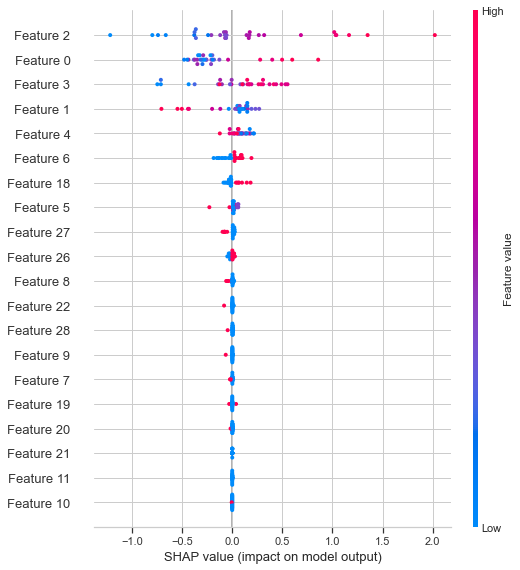

In [48]:
shap.summary_plot(shap_values2, Xn_test)

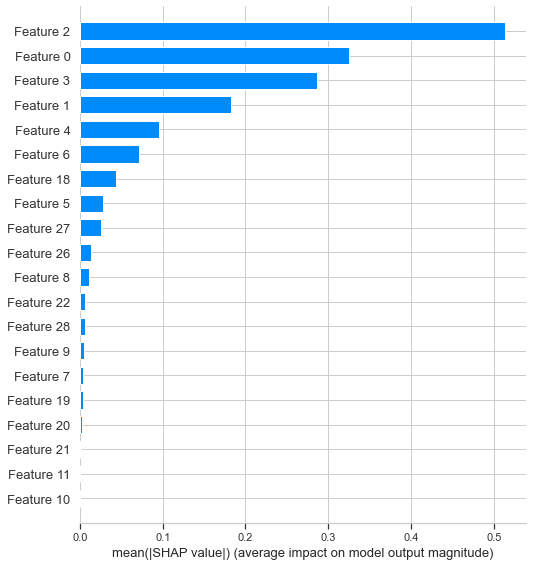

In [49]:
shap.summary_plot(shap_values2, Xn_test, plot_type='bar')

Features 0,1,2,3 are shared by both NN and XGBoost models with regards to their importances. However, the Neural Network is apparently seeing different relationships and it's understanding is much more complex than the XGBoost's. 

# Conclusion

I have succesfully created a model which is able to predict the toxicity with a RMSE of 1.06, which I consider to be quite good. After trying out approaches with NN using the SELU activation function, which resulted to be an overkill, the ReLU model did just fine. XGBoost was not able to get better results, even after using a Randomized Search for hyperparameter tuning.